In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('Input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

Input\fake_account__data_dict\fake_account__data_dict.csv
Input\Instagram fake spammer genuine accounts\test.csv
Input\Instagram fake spammer genuine accounts\train.csv
Input\social_media_aim\social_media_aim.csv
Input\social_media_test\social_media_test.csv
Input\social_media_train\social_media_train.csv


# 2) Gather Data
The data is in the social_media_train.csv file. The target vector is given by the 'fake' column. Here the modules that typically are needed for reading and exploration are imported and then read in pandas DataFrame df_train.

In [2]:
# Import neccessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdpipe as pdp
%matplotlib inline

# 3) Exploratory Data Analysis (EDA)

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set max width of cell
pd.options.display.max_colwidth=300

# Display all columns
pd.set_option('display.max_columns', None)

# Read data
df_train = pd.read_csv(r"E:\Program Files (x86)\ML Project\Fake_social_media\fakeaccountdetection\Input\social_media_train\social_media_train.csv", index_col=[0])
df_train = df_train.drop(['sim_name_username'], axis=1)
display(df_train.head(),df_train.info())


<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 0 to 575
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fake                   576 non-null    int64  
 1   profile_pic            576 non-null    object 
 2   ratio_numlen_username  576 non-null    float64
 3   len_fullname           576 non-null    int64  
 4   ratio_numlen_fullname  576 non-null    float64
 5   len_desc               576 non-null    int64  
 6   extern_url             576 non-null    object 
 7   private                576 non-null    object 
 8   num_posts              576 non-null    int64  
 9   num_followers          576 non-null    int64  
 10  num_following          576 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 54.0+ KB


,fake,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,extern_url,private,num_posts,num_followers,num_following
0,0,Yes,0.27,0,0.0,53,No,No,32,1000,955
1,0,Yes,0.00,2,0.0,44,No,No,286,2740,533
2,0,Yes,0.10,2,0.0,0,No,Yes,13,159,98
3,0,Yes,0.00,1,0.0,82,No,No,679,414,651
4,0,Yes,0.00,2,0.0,0,No,Yes,6,151,126


None

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (576, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,0.000000,575.000000,Possible ID column: drop before modeling step.
fake,int64,0.000000,0,0.000000,1.000000,No issue
profile_pic,object,0.000000,0,,,No issue
ratio_numlen_username,float64,0.000000,NA,0.000000,0.920000,Column has 12 outliers greater than upper bound (0.77) or lower than lower bound(-0.46). Cap them or remove them.
len_fullname,int64,0.000000,1,0.000000,12.000000,Column has 15 outliers greater than upper bound (3.50) or lower than lower bound(-0.50). Cap them or remove them.
ratio_numlen_fullname,float64,0.000000,NA,0.000000,1.000000,Column has 58 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
sim_name_username,object,0.000000,0,,,No issue
len_desc,int64,0.000000,18,0.000000,150.000000,Column has 53 outliers greater than upper bound (85.00) or lower than lower bound(-51.00). Cap them or remove them.
extern_url,object,0.000000,0,,,No issue
private,object,0.000000,0,,,No issue


Number of All Scatter Plots = 3


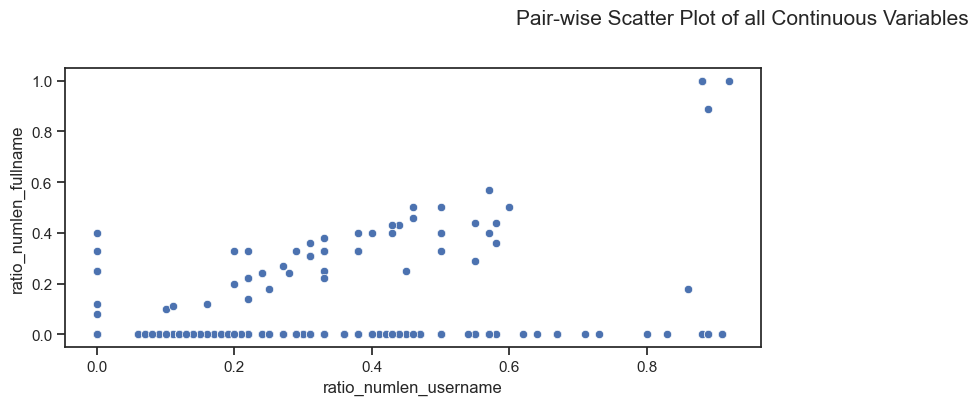

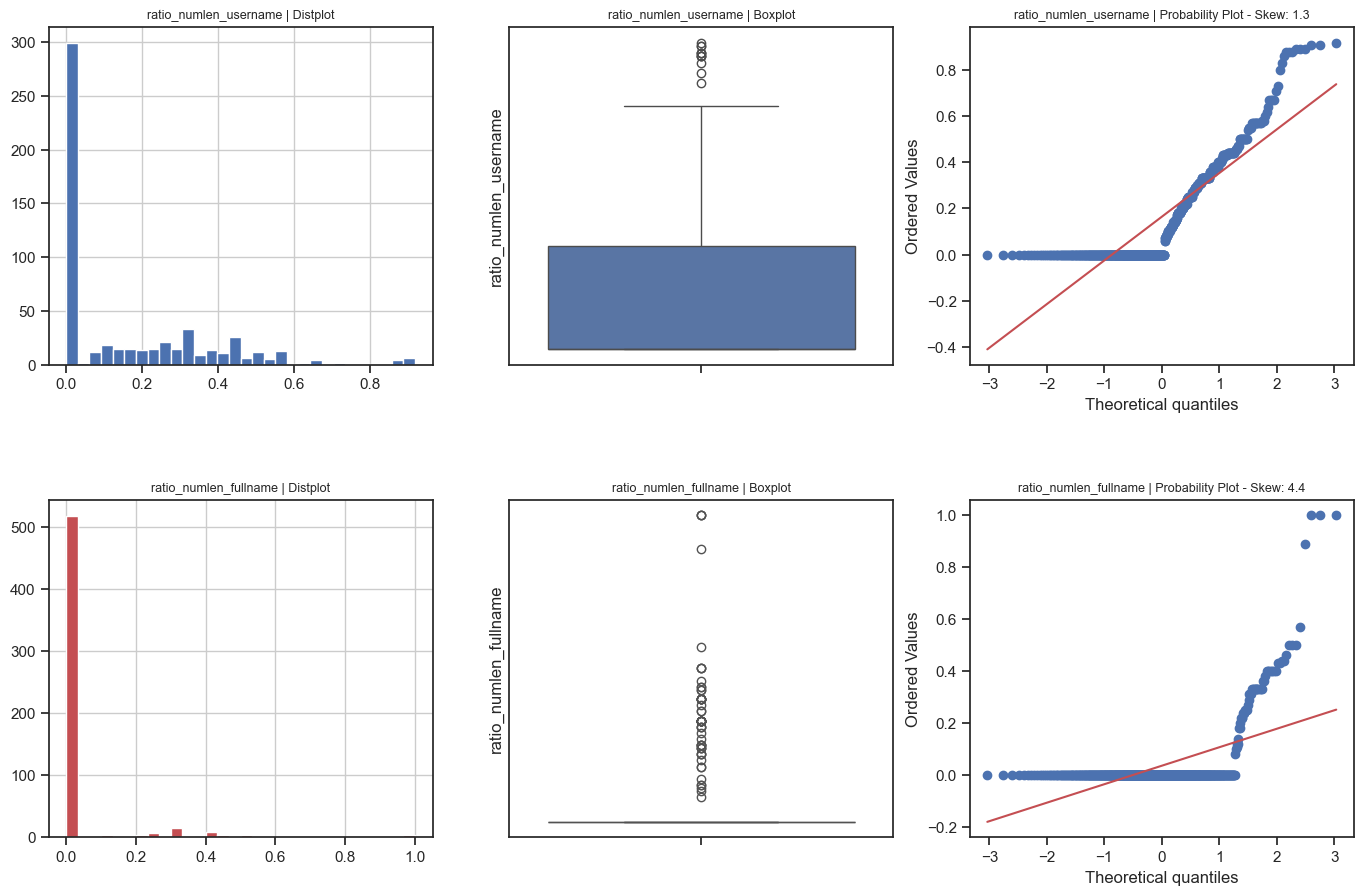

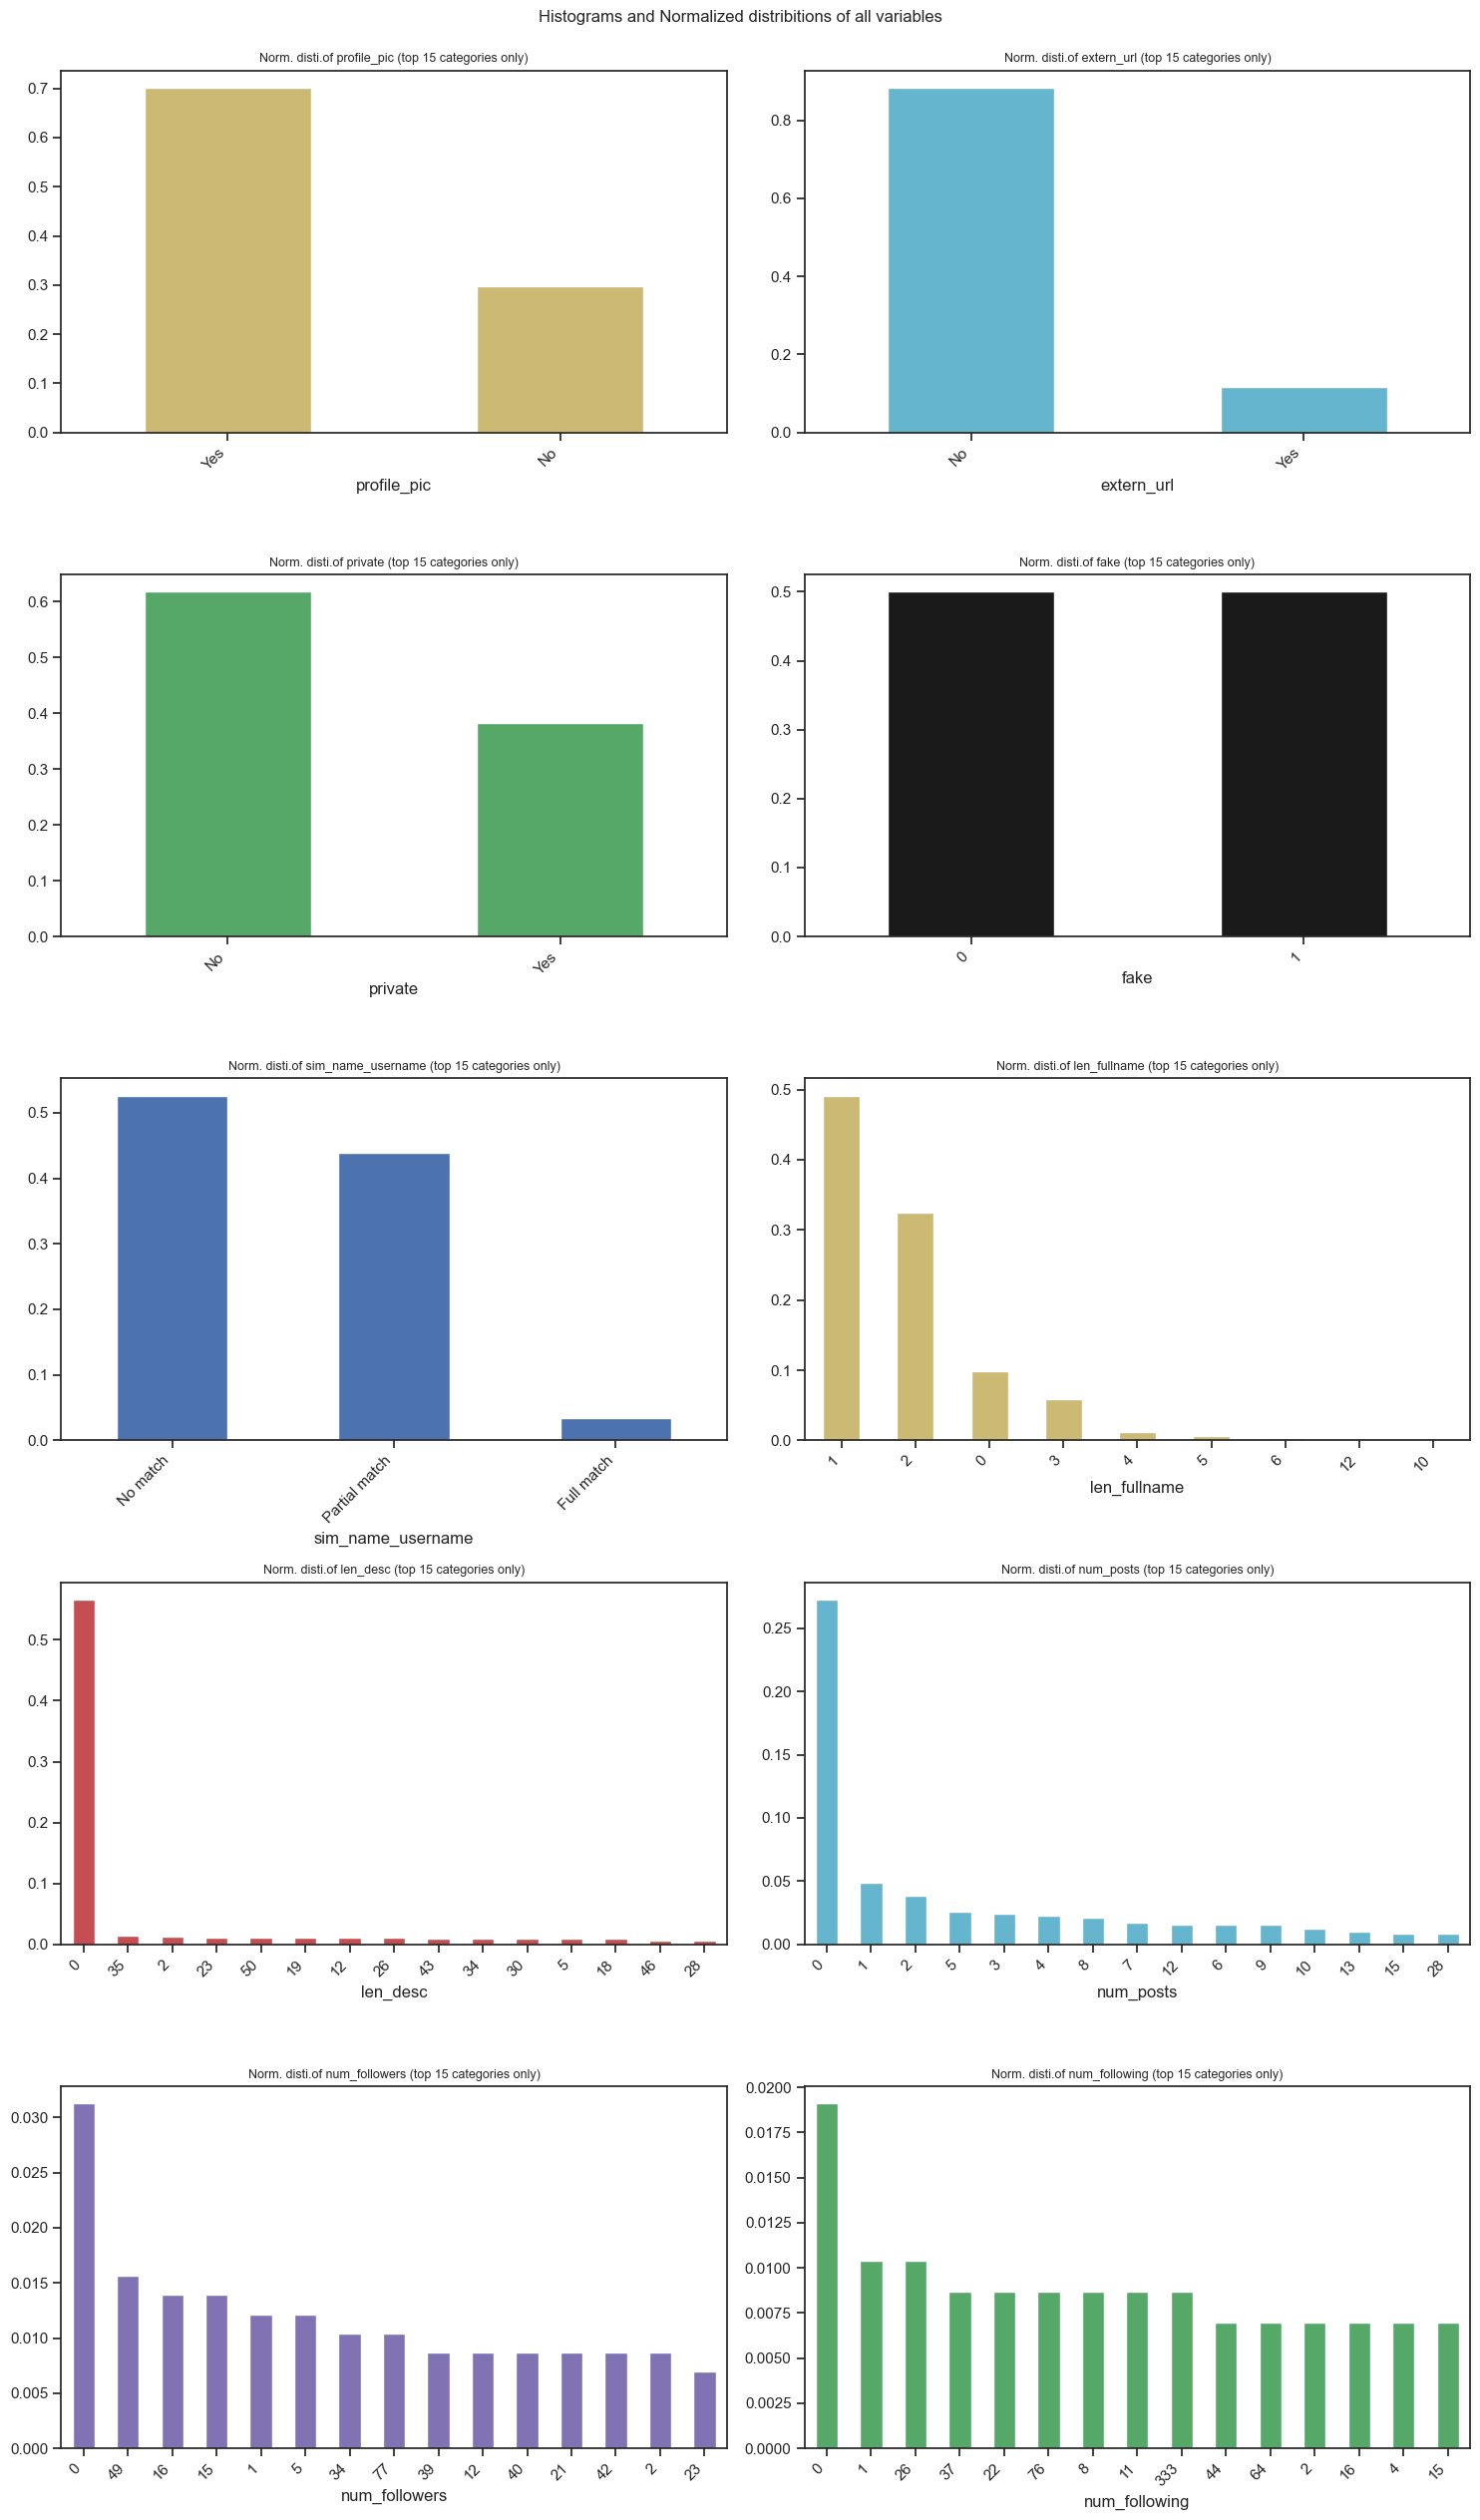

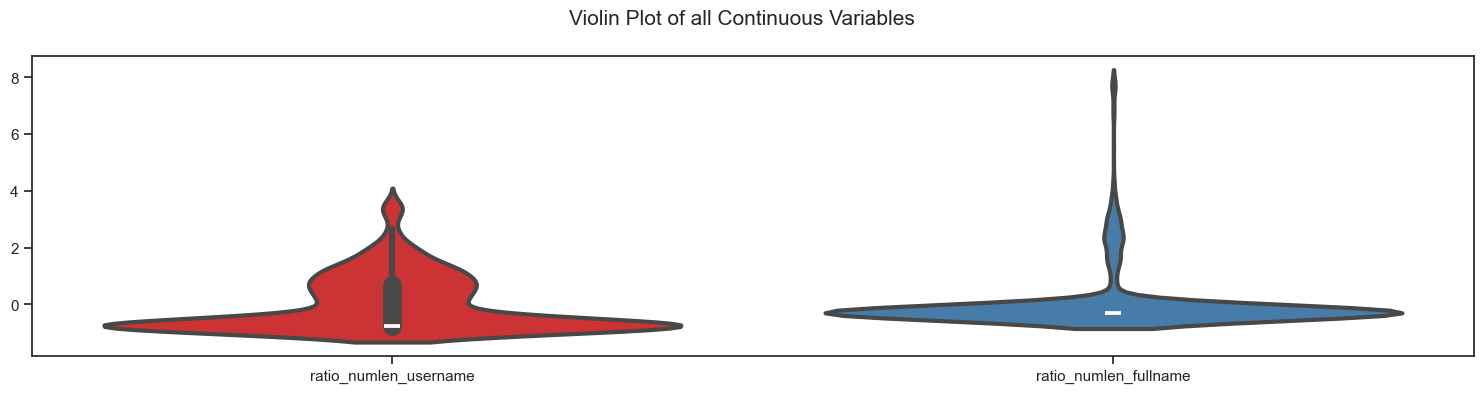

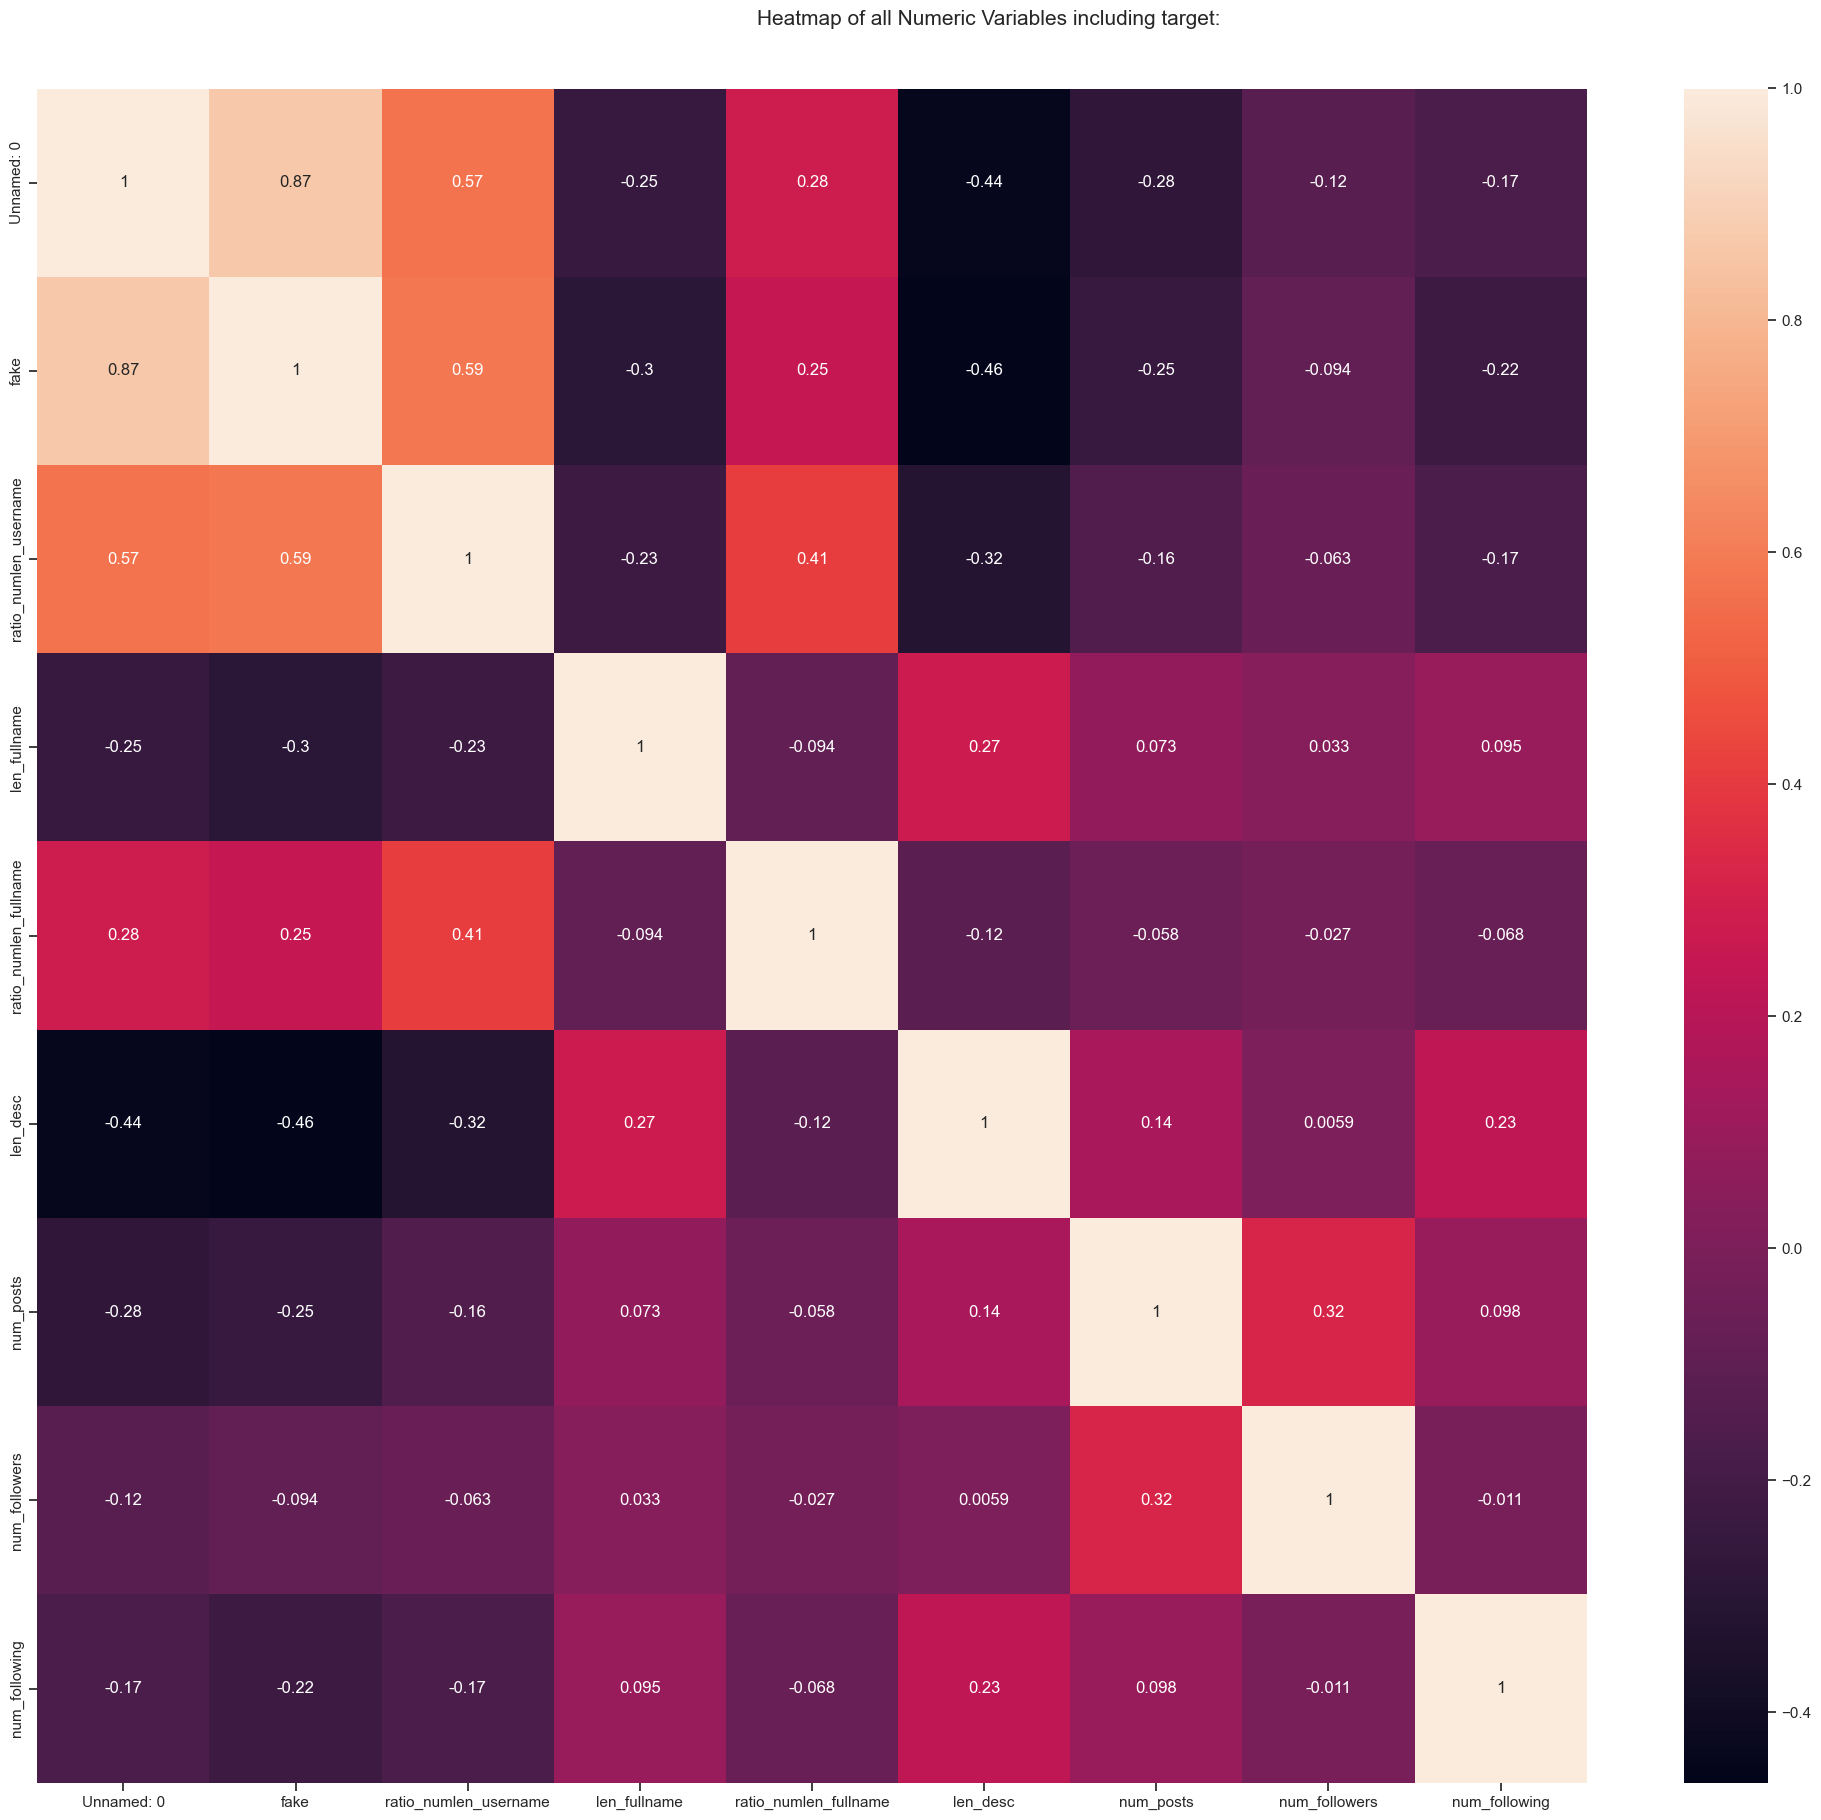

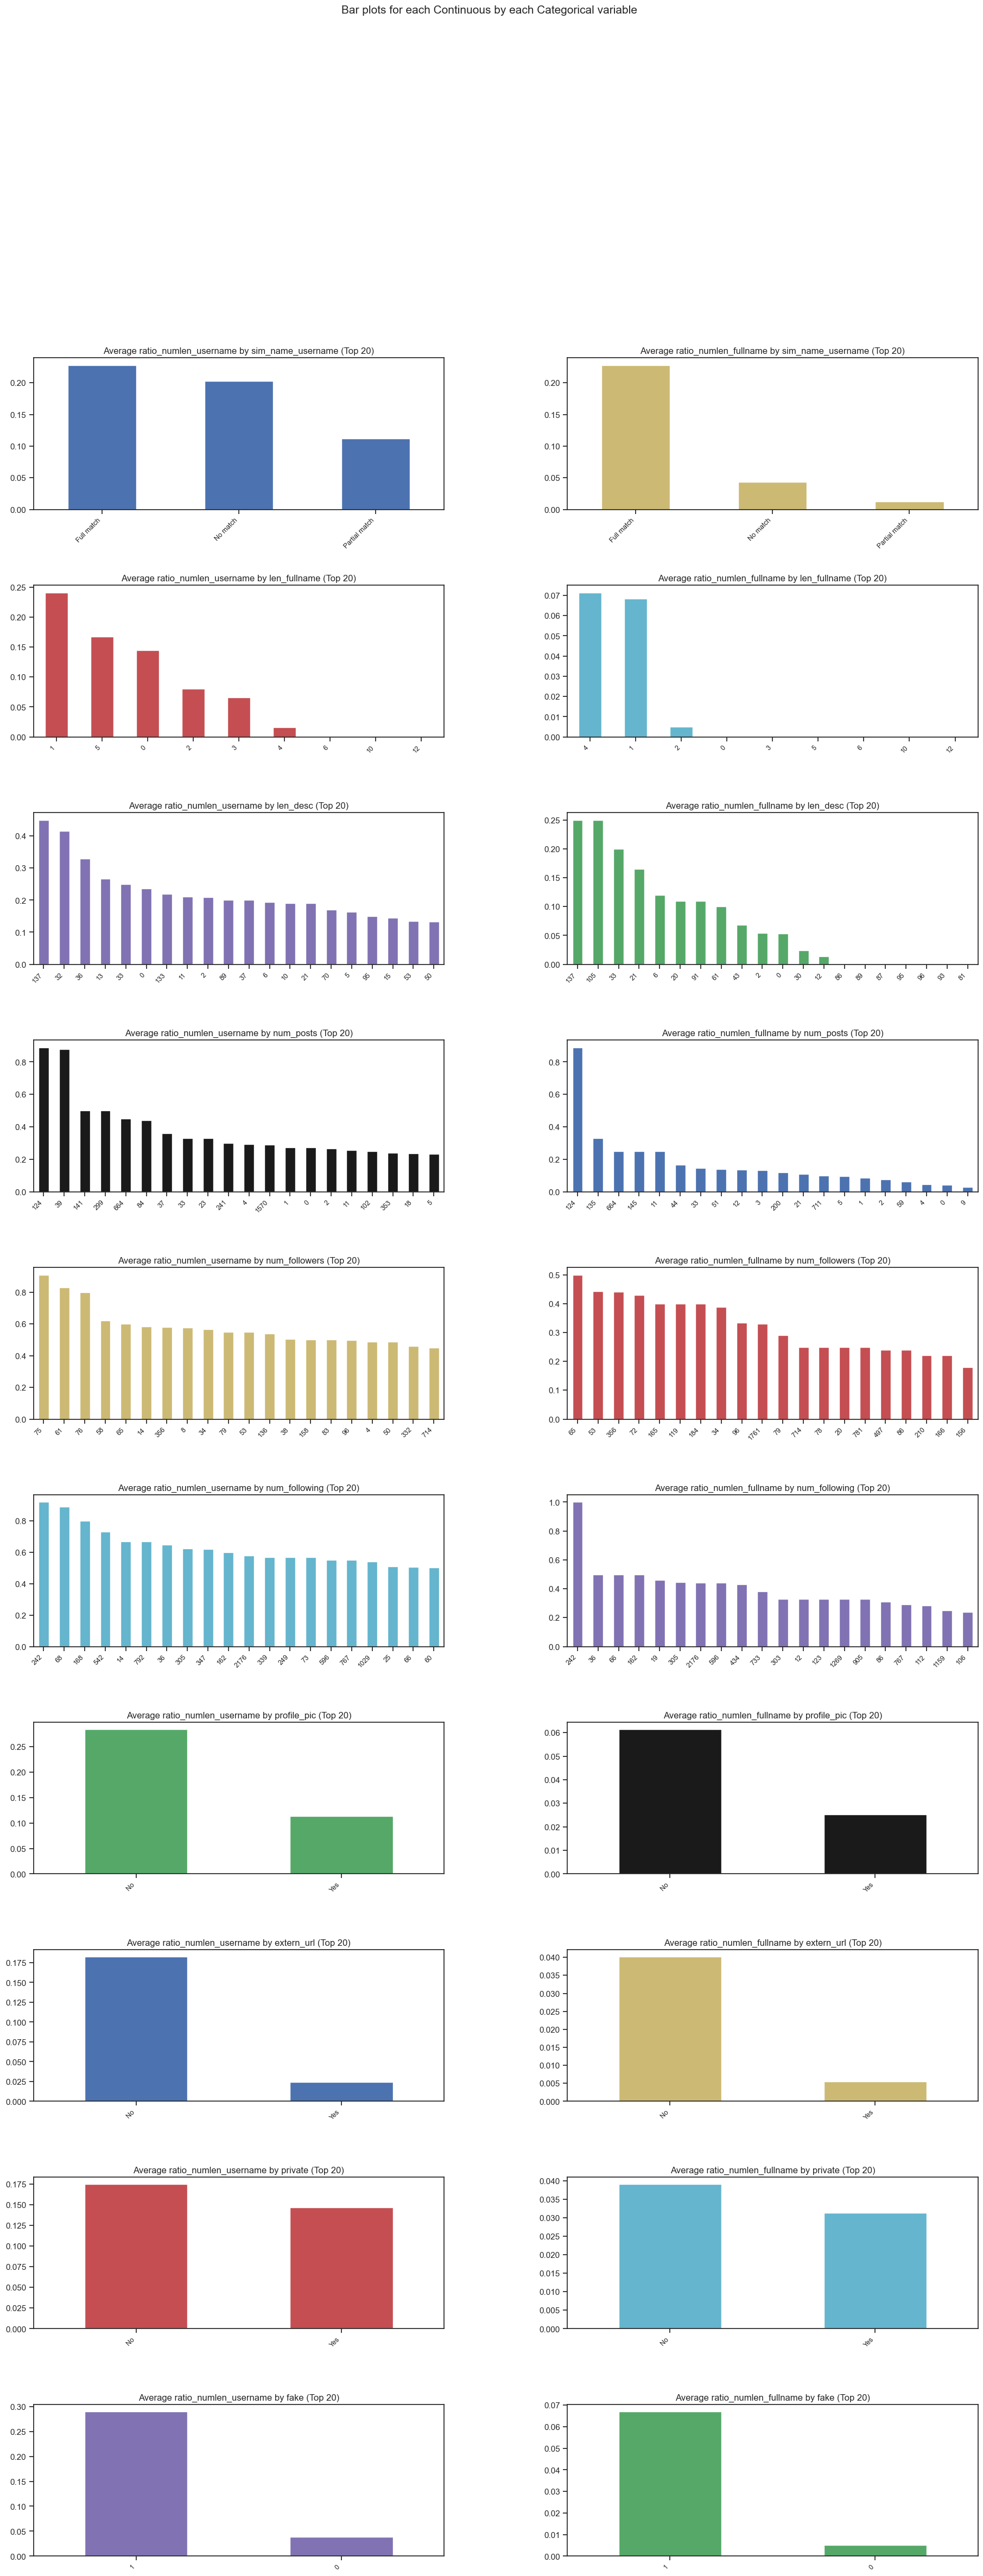

All Plots done
Time to run AutoViz = 9 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [4]:
from autoviz.AutoViz_Class import AutoViz_Class


AV = AutoViz_Class()

import matplotlib.pyplot as plt
%matplotlib inline
filename = r"E:\Program Files (x86)\ML Project\Fake_social_media\fakeaccountdetection\Input\social_media_train\social_media_train.csv"

dft = AV.AutoViz(
    filename,
    sep=','
)

Each line of df_train represents a user or user account.


In [5]:
# Dataset Description
data_dict = pd.read_csv(r"E:\Program Files (x86)\ML Project\Fake_social_media\fakeaccountdetection\Input\fake_account__data_dict\fake_account__data_dict.csv", index_col='No.')
#data_dict = data_dict.drop(['sim_name_username'], axis=1)
data_dict

,Column name,Data Type,Description
No.,,,
0,'profile_pic',categorical,Whether the account has a profile picture (1) or not (0)
1,'ratio_numlen_username',numerical (float),Ratio of numeric characters in the account username to its length
2,'len_fullname',numerical (int),Number of characters in the user's full name
3,'ratio_numlen_fullname',numerical (float),Ratio of numeric characters in the user's full name to its length
4,'sim_name_username',categorical,"Whether the user's name matches their username completely (1),not at all (0)."
5,'len_desc',numerical (int),Number of characters in the account description
6,'extern_url',categorical,Whether the account description includes a URL (1) or not (2)
7,'private',categorical,Whether the user's posts are visible only to their followers (1) or to all Instagram users (2).
8,'num_posts',numerical (int),Number of posts in the user account


In [6]:
# Determine categorical and numerical features

# Numerical columns
num_cols = ['ratio_numlen_username','len_fullname','ratio_numlen_fullname',
            'len_desc','num_posts','num_followers',
              'num_following']
# Categorical columns
cat_cols = [col for col in df_train.columns.values.tolist() if col not in num_cols]
cat_cols

['fake', 'profile_pic', 'extern_url', 'private']

In [7]:
# Display the summary statistics
df_train.describe()



,fake,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,num_posts,num_followers,num_following
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000
mean,0.500000,0.163837,1.460069,0.036094,22.623264,107.489583,8.530724e+04,508.381944
std,0.500435,0.214096,1.052601,0.125121,37.702987,402.034431,9.101485e+05,917.981239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000
50%,0.500000,0.000000,1.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000
75%,1.000000,0.310000,2.000000,0.000000,34.000000,81.500000,7.160000e+02,589.500000
max,1.000000,0.920000,12.000000,1.000000,150.000000,7389.000000,1.533854e+07,7500.000000


(-1.1, 1.1, -1.1, 1.1)

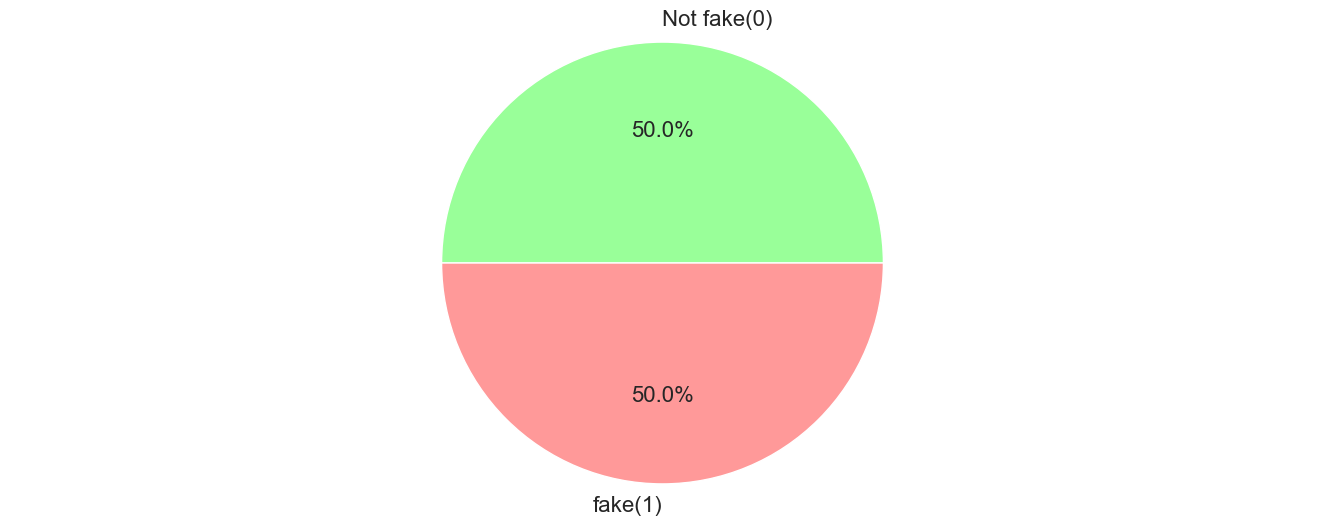

In [8]:
# Get an idea of target category share: fake
plt.figure(figsize=(15,6))
fake_share = df_train["fake"].value_counts()
mylabel=["Not fake(0)","fake(1)"]
colors = ['#99ff99','#ff9999']
plt.pie(fake_share,
        labels=mylabel,autopct="%1.1f%%",colors=colors,
        textprops={'fontsize': 16})
plt.axis("equal")

In [9]:
# Correlation heatmap
# Colormap: Most negative correlations (dark-blue) to most positive correlation (dark red)
corr = df_train[num_cols].corr()
cmap_custom = sns.diverging_palette(255, 0, s=75, l=50, n=10, as_cmap=True)
corr.style.background_gradient(cmap=cmap_custom)


,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,num_posts,num_followers,num_following
ratio_numlen_username,1.000000,-0.225472,0.408567,-0.321170,-0.157442,-0.062785,-0.172413
len_fullname,-0.225472,1.000000,-0.094348,0.272522,0.073350,0.033225,0.094855
ratio_numlen_fullname,0.408567,-0.094348,1.000000,-0.117521,-0.057716,-0.027035,-0.067971
len_desc,-0.321170,0.272522,-0.117521,1.000000,0.144824,0.005929,0.226561
num_posts,-0.157442,0.073350,-0.057716,0.144824,1.000000,0.321385,0.098225
num_followers,-0.062785,0.033225,-0.027035,0.005929,0.321385,1.000000,-0.011066
num_following,-0.172413,0.094855,-0.067971,0.226561,0.098225,-0.011066,1.000000


In [10]:
df_train.head()

,fake,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,extern_url,private,num_posts,num_followers,num_following
0,0,Yes,0.27,0,0.0,53,No,No,32,1000,955
1,0,Yes,0.00,2,0.0,44,No,No,286,2740,533
2,0,Yes,0.10,2,0.0,0,No,Yes,13,159,98
3,0,Yes,0.00,1,0.0,82,No,No,679,414,651
4,0,Yes,0.00,2,0.0,0,No,Yes,6,151,126


In [11]:
import pickle
def label_encoding(df):
    # label encoding
    dict_label_encoding = {'Yes': 1, 'No': 0}
    df.loc[:, 'profile_pic'] = df.loc[:, 'profile_pic'].replace(dict_label_encoding)
    df.loc[:, 'extern_url'] = df.loc[:, 'extern_url'].replace(dict_label_encoding)
    df.loc[:, 'private'] = df.loc[:, 'private'].replace(dict_label_encoding)

    ## one-hot encoding
    #onehot = pdp.OneHotEncode(["sim_name_username"], drop_first=False)
    ## fit and transform on train set
    #df = onehot.fit_transform(df)
    return df       

# Apply function label_encoding
df_train = label_encoding(df_train)
df_train.head()

,fake,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,extern_url,private,num_posts,num_followers,num_following
0,0,1,0.27,0,0.0,53,0,0,32,1000,955
1,0,1,0.00,2,0.0,44,0,0,286,2740,533
2,0,1,0.10,2,0.0,0,0,1,13,159,98
3,0,1,0.00,1,0.0,82,0,0,679,414,651
4,0,1,0.00,2,0.0,0,0,1,6,151,126


In [51]:
import pickle

# Assuming df_train is already label encoded
with open('df_train.pkl', 'wb') as f:
    pickle.dump(df_train, f)


## 4. Model Implementation

In [12]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Feature matrix and target vector
features_train = df_train.iloc[:, 1:]
target_train = df_train.loc[:, 'fake']

# Model instantiation
model_log = LogisticRegression(solver='lbfgs', max_iter=10000, C=1e42, random_state=42)

# Model fitting
model_log.fit(features_train, target_train)


LogisticRegression(C=1e+42, max_iter=10000, random_state=42)

# 5) Model Performance Evaluation 

We use test data from social_media_test.csv for initial classification performance:

In [13]:
# Read data
df_test = pd.read_csv(r"E:\Program Files (x86)\ML Project\Fake_social_media\fakeaccountdetection\Input\social_media_test\social_media_test.csv",index_col=[0])
#df_test = df_test.drop(['sim_name_username'], axis=1)
df_test = label_encoding(df_test)
df_test.head()

,fake,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,sim_name_username,len_desc,extern_url,private,num_posts,num_followers,num_following
0,0,1,0.33,1,0.33,Full match,30,0,1,35,488.0,604
1,0,1,0.00,5,0.00,Partial match,64,0,1,3,35.0,6
2,0,1,0.00,2,0.00,Partial match,82,0,1,319,328.0,668
3,0,1,0.00,1,0.00,No match,143,0,1,273,14890.0,7369
4,0,1,0.50,1,0.00,No match,76,0,1,6,225.0,356


# Conventional ML models

## Logistic Regression

In [14]:
from sklearn.metrics import precision_score

target_test = df_test['fake']

# Define and assign features_test
features_test = df_test.drop('fake', axis=1)

# One-hot encode categorical variables in testing data
features_test_encoded = pd.get_dummies(features_test, columns=['profile_pic', 'extern_url', 'private'])


# Get the missing and additional columns in testing data compared to training data
missing_cols = set(features_train.columns) - set(features_test_encoded.columns)
additional_cols = set(features_test_encoded.columns) - set(features_train.columns)

# Add missing columns to testing data with zero values
for col in missing_cols:
    features_test_encoded[col] = 0

# Remove additional columns from testing data
for col in additional_cols:
    features_test_encoded.drop(col, axis=1, inplace=True)

# Ensure that the order of columns in testing data matches that of training data
features_test_encoded = features_test_encoded.reindex(columns=features_train.columns, fill_value=0)

# Predict target values
target_test_pred_log = model_log.predict(features_test_encoded)

# Model evaluation
precision_log = precision_score(target_test, target_test_pred_log)

# Print results
print('Log Regression Precision: ', precision_log)


Log Regression Precision:  0.5728155339805825


In [15]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Assuming target_test and target_test_pred_log are already defined as per your code

# Calculate additional evaluation metrics
accuracy_log = accuracy_score(target_test, target_test_pred_log)
f1_log = f1_score(target_test, target_test_pred_log)
recall_log = recall_score(target_test, target_test_pred_log)

# Print results
print('Log Regression Accuracy:', accuracy_log)
print('Log Regression F1 Score:', f1_log)
print('Log Regression Recall:', recall_log)


Log Regression Accuracy: 0.625
Log Regression F1 Score: 0.7239263803680982
Log Regression Recall: 0.9833333333333333


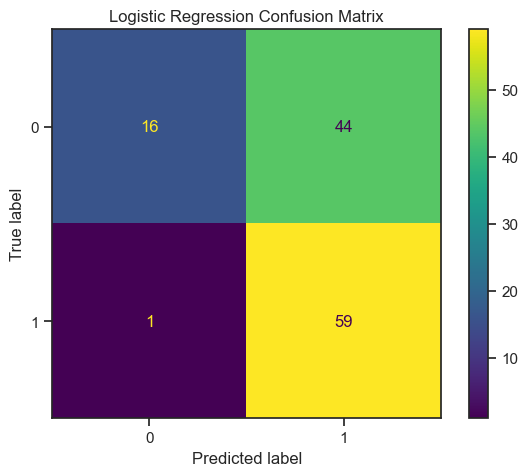

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming target_test and target_test_pred_log are already defined as per your code

# Plotting the confusion matrix for Logistic Regression
cm_log = confusion_matrix(target_test, target_test_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()


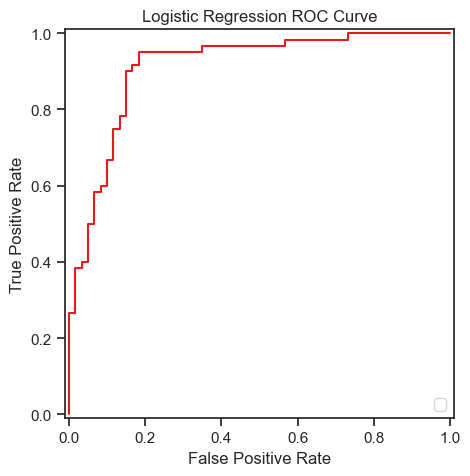

In [17]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Assuming model_log is your trained Logistic Regression model
fpr_log, tpr_log, thresholds_log = roc_curve(target_test, model_log.predict_proba(features_test_encoded)[:, 1])
roc_display_log = RocCurveDisplay(fpr=fpr_log, tpr=tpr_log).plot()
plt.title('Logistic Regression ROC Curve')
plt.show()


## KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score)

# Assuming features_train, target_train, features_test_encoded, and target_test are already defined

# Instantiate and fit KNN model
model_knn = KNeighborsClassifier()
model_knn.fit(features_train, target_train)

# Predict target values from KNN model
target_test_pred_knn = model_knn.predict(features_test_encoded)

# Model evaluation for KNN
precision_knn = precision_score(target_test, target_test_pred_knn)
recall_knn = recall_score(target_test, target_test_pred_knn)
f1_knn = f1_score(target_test, target_test_pred_knn)
accuracy_knn = accuracy_score(target_test, target_test_pred_knn)

# Calculate confusion matrix to derive additional metrics
conf_matrix = confusion_matrix(target_test, target_test_pred_knn)
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate additional metrics
fdr = FP / (FP + TP) if (FP + TP) > 0 else 0
fnr = FN / (FN + TP) if (FN + TP) > 0 else 0
for_rate = FN / (FN + TN) if (FN + TN) > 0 else 0
fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

# Print results for KNN model
print('KNN Precision:', precision_knn)
print('KNN Recall:', recall_knn)
print('KNN F1 Score:', f1_knn)
print('KNN Accuracy:', accuracy_knn)
print(f'KNN FDR: {fdr:.4f}')
print(f'KNN FNR: {fnr:.4f}')
print(f'KNN FOR: {for_rate:.4f}')
print(f'KNN FPR: {fpr:.4f}')
print(f'KNN Specificity: {specificity:.4f}')

# Calculate ROC AUC
roc_auc = roc_auc_score(target_test, target_test_pred_knn)
print(f'KNN ROC AUC: {roc_auc:.4f}')


KNN Precision: 0.8727272727272727
KNN Recall: 0.8
KNN F1 Score: 0.8347826086956521
KNN Accuracy: 0.8416666666666667
KNN FDR: 0.1273
KNN FNR: 0.2000
KNN FOR: 0.1846
KNN FPR: 0.1167
KNN Specificity: 0.8833
KNN ROC AUC: 0.8417


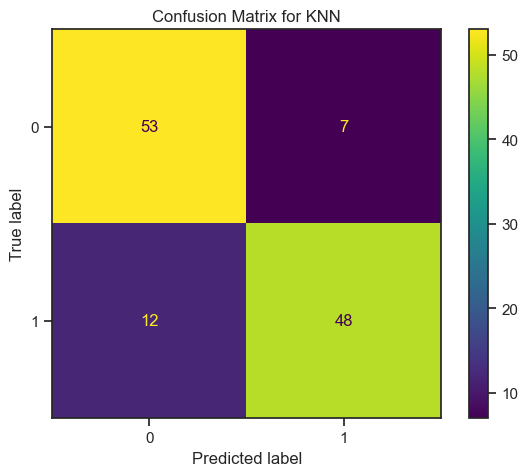

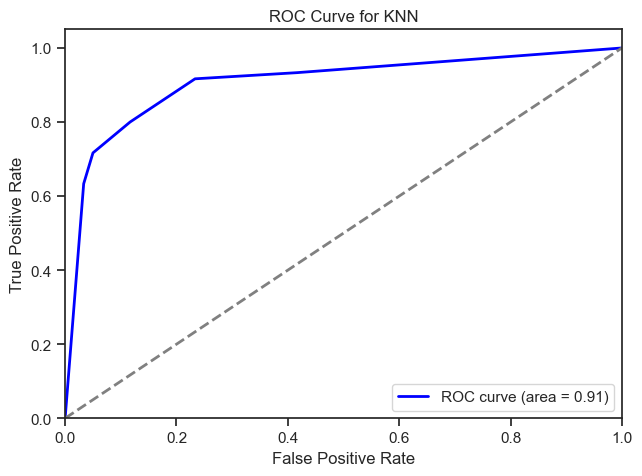

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay

# Generate the confusion matrix
conf_matrix_knn = confusion_matrix(target_test, target_test_pred_knn)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn)
disp.plot()
plt.title('Confusion Matrix for KNN')
plt.show()

# Calculate the ROC curve and AUC
fpr_knn, tpr_knn, _ = roc_curve(target_test, model_knn.predict_proba(features_test_encoded)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

Decision Tree Precision:  0.7397260273972602
Decision Tree Accuracy: 0.7916666666666666
Decision Tree F1 Score: 0.8120300751879699
Decision Tree Recall: 0.9


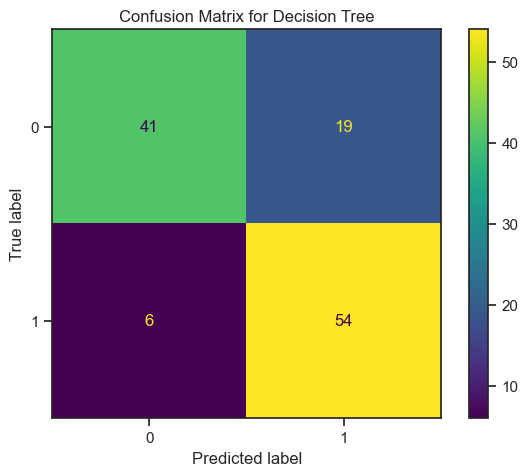

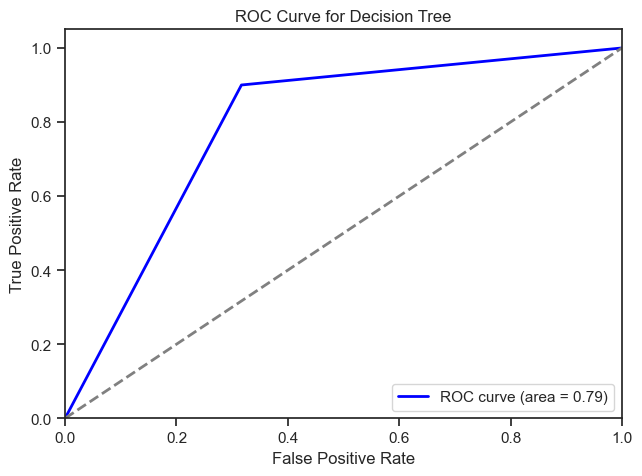

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, accuracy_score, f1_score, recall_score, ConfusionMatrixDisplay

# Instantiate and fit Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(features_train, target_train)

# Predict target values from Decision Tree model
target_test_pred_dt = model_dt.predict(features_test_encoded)

# Model evaluation for Decision Tree
precision_dt = precision_score(target_test, target_test_pred_dt)
accuracy_dt = accuracy_score(target_test, target_test_pred_dt)
f1_dt = f1_score(target_test, target_test_pred_dt)
recall_dt = recall_score(target_test, target_test_pred_dt)

# Print results for Decision Tree
print('Decision Tree Precision: ', precision_dt)
print('Decision Tree Accuracy:', accuracy_dt)
print('Decision Tree F1 Score:', f1_dt)
print('Decision Tree Recall:', recall_dt)

# Generate the confusion matrix
conf_matrix_dt = confusion_matrix(target_test, target_test_pred_dt)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt)
disp.plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Calculate the ROC curve and AUC
fpr_dt, tpr_dt, _ = roc_curve(target_test, model_dt.predict_proba(features_test_encoded)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

## SVM

SVM Precision:  0.5128205128205128
SVM Accuracy: 0.525
SVM F1 Score: 0.6779661016949152
SVM Recall: 1.0


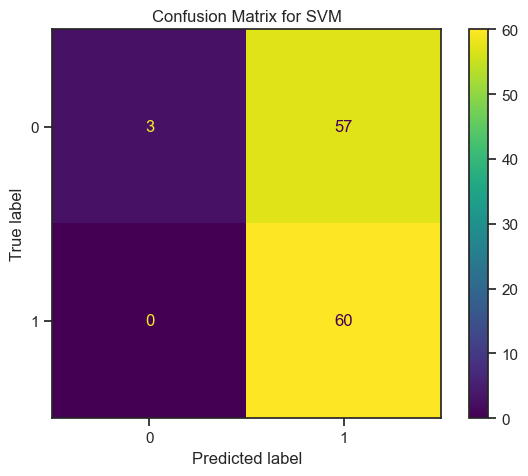

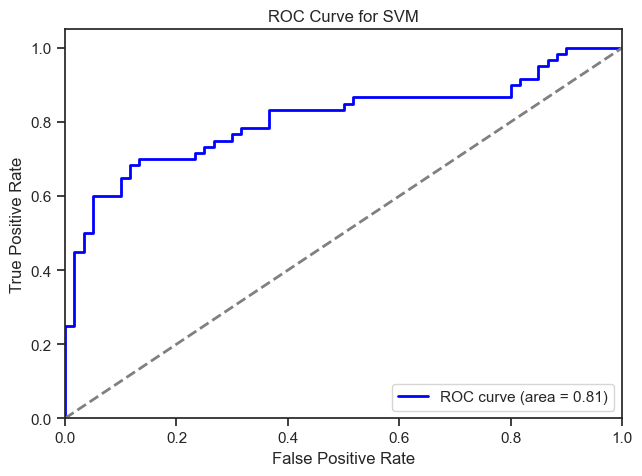

In [21]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, accuracy_score, f1_score, recall_score, ConfusionMatrixDisplay

# Instantiate and fit SVM model
model_svm = SVC(random_state=42, probability=True)  # Set probability=True to enable predict_proba
model_svm.fit(features_train, target_train)

# Predict target values from SVM model
target_test_pred_svm = model_svm.predict(features_test_encoded)

# Model evaluation for SVM
precision_svm = precision_score(target_test, target_test_pred_svm)
accuracy_svm = accuracy_score(target_test, target_test_pred_svm)
f1_svm = f1_score(target_test, target_test_pred_svm)
recall_svm = recall_score(target_test, target_test_pred_svm)

# Print results for SVM
print('SVM Precision: ', precision_svm)
print('SVM Accuracy:', accuracy_svm)
print('SVM F1 Score:', f1_svm)
print('SVM Recall:', recall_svm)

# Generate the confusion matrix
conf_matrix_svm = confusion_matrix(target_test, target_test_pred_svm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm)
disp.plot()
plt.title('Confusion Matrix for SVM')
plt.show()

# Calculate the ROC curve and AUC
fpr_svm, tpr_svm, _ = roc_curve(target_test, model_svm.predict_proba(features_test_encoded)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()

## Random Forest

RF Precision: 0.7972972972972973
RF Accuracy: 0.8666666666666667
RF F1 Score: 0.8805970149253731
RF Recall: 0.9833333333333333
RF FDR: 0.2027
RF FNR: 0.0167
RF FOR: 0.0217
RF FPR: 0.2500
RF Specificity: 0.7500


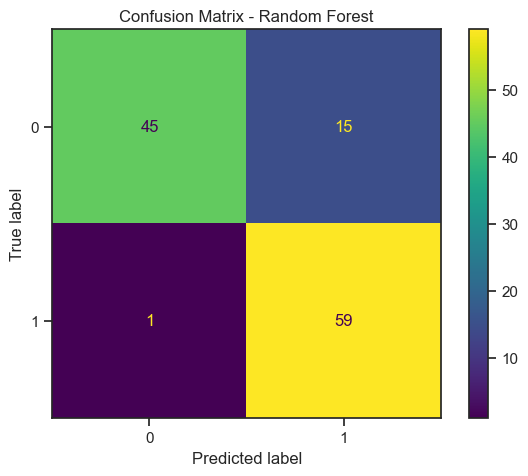

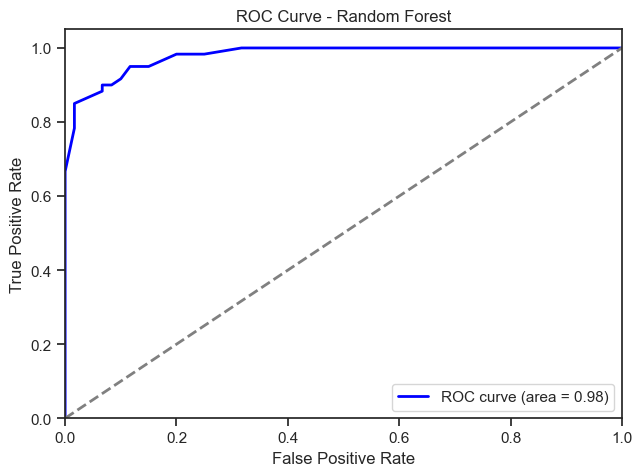

In [22]:
# Assuming features_train, target_train, features_test_encoded, and target_test are already defined
from sklearn.ensemble import RandomForestClassifier
# Train the RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=35, max_depth=90, random_state=42)
model_rf.fit(features_train, target_train)
target_test_pred_rf = model_rf.predict(features_test_encoded)

# Model evaluation for RF
precision_rf = precision_score(target_test, target_test_pred_rf)
accuracy_rf = accuracy_score(target_test, target_test_pred_rf)
f1_rf = f1_score(target_test, target_test_pred_rf)
recall_rf = recall_score(target_test, target_test_pred_rf)

# Calculate confusion matrix to derive additional metrics
conf_matrix_rf = confusion_matrix(target_test, target_test_pred_rf)
TN, FP, FN, TP = conf_matrix_rf.ravel()

# Calculate additional metrics
fdr_rf = FP / (FP + TP) if (FP + TP) > 0 else 0
fnr_rf = FN / (FN + TP) if (FN + TP) > 0 else 0
for_rf = FN / (FN + TN) if (FN + TN) > 0 else 0
fpr_rf = FP / (FP + TN) if (FP + TN) > 0 else 0
specificity_rf = TN / (TN + FP) if (TN + FP) > 0 else 0

# Print results for RF model
print('RF Precision:', precision_rf)
print('RF Accuracy:', accuracy_rf)
print('RF F1 Score:', f1_rf)
print('RF Recall:', recall_rf)
print(f'RF FDR: {fdr_rf:.4f}')
print(f'RF FNR: {fnr_rf:.4f}')
print(f'RF FOR: {for_rf:.4f}')
print(f'RF FPR: {fpr_rf:.4f}')
print(f'RF Specificity: {specificity_rf:.4f}')

# Plot confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp_rf.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Plot ROC curve
target_test_prob_rf = model_rf.predict_proba(features_test_encoded)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(target_test, target_test_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve with AUC
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


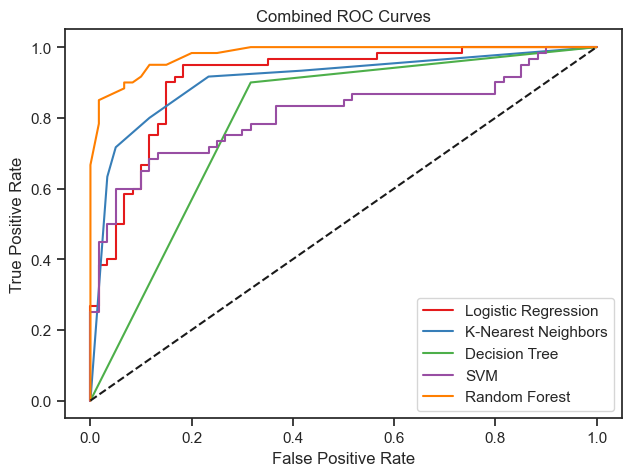

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, confusion_matrix
import numpy as np

# Calculate ROC curves
fpr_log, tpr_log, _ = roc_curve(target_test, model_log.predict_proba(features_test_encoded)[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(target_test, model_knn.predict_proba(features_test_encoded)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(target_test, model_dt.predict_proba(features_test_encoded)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(target_test, model_svm.decision_function(features_test_encoded))
fpr_rf, tpr_rf, _ = roc_curve(target_test, model_rf.predict_proba(features_test_encoded)[:, 1])

# Plot combined ROC curves
plt.figure()
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves')
plt.legend(loc='best')
plt.show()


# Tuned ML models

## Tuned KNN

Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best score: 0.9114492753623188
Accuracy: 0.8750
Precision: 0.8947
Recall: 0.8500
F1-score: 0.8718
FDR: 0.1053
FNR: 0.1500
FOR: 0.1429
FPR: 0.1000
Specificity: 0.9000
ROC AUC: 0.8750


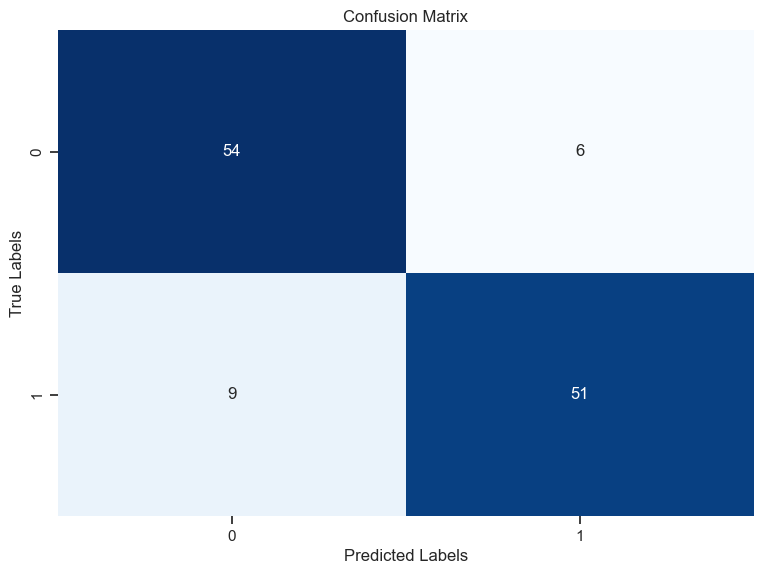

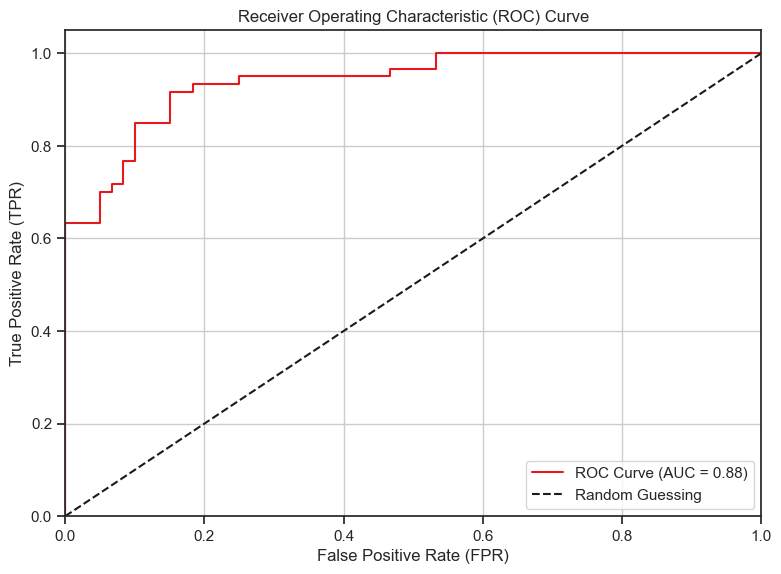

In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
import seaborn as sns

# Define the parameter grid
param_grid = {
    'n_neighbors': [11, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Instantiate KNN model
tuned_knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(tuned_knn, param_grid, cv=25, scoring='accuracy', return_train_score=True)

# Fit the model with the grid search
grid_search.fit(features_train, target_train)

# Print the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Predict using the best estimator
target_test_pred_knn = grid_search.best_estimator_.predict(features_test_encoded)

# Calculate evaluation metrics for the best estimator
accuracy_tuned_knn = accuracy_score(target_test, target_test_pred_knn)
precision_tuned_knn = precision_score(target_test, target_test_pred_knn)
recall_tuned_knn = recall_score(target_test, target_test_pred_knn)
f1_tuned_knn = f1_score(target_test, target_test_pred_knn)

# Calculate confusion matrix to derive additional metrics
conf_matrix = confusion_matrix(target_test, target_test_pred_knn)
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate additional metrics
fdr = FP / (FP + TP) if (FP + TP) > 0 else 0
fnr = FN / (FN + TP) if (FN + TP) > 0 else 0
for_rate = FN / (FN + TN) if (FN + TN) > 0 else 0
fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

# Print results for the best KNN model
print(f'Accuracy: {accuracy_tuned_knn:.4f}')
print(f'Precision: {precision_tuned_knn:.4f}')
print(f'Recall: {recall_tuned_knn:.4f}')
print(f'F1-score: {f1_tuned_knn:.4f}')
print(f'FDR: {fdr:.4f}')
print(f'FNR: {fnr:.4f}')
print(f'FOR: {for_rate:.4f}')
print(f'FPR: {fpr:.4f}')
print(f'Specificity: {specificity:.4f}')

# Calculate ROC AUC
fpr_curve, tpr_curve, thresholds = roc_curve(target_test, grid_search.best_estimator_.predict_proba(features_test_encoded)[:, 1])
roc_auc = roc_auc_score(target_test, target_test_pred_knn)
print(f'ROC AUC: {roc_auc:.4f}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_curve, tpr_curve, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Tuned RF

Best parameters: {'max_depth': 70, 'min_samples_split': 30, 'n_estimators': 55}
Best score: 0.9322038980509746
Tuned RF Precision: 0.7228915662650602
Tuned RF Accuracy: 0.8083333333333333
Tuned RF F1 Score: 0.8391608391608392
Tuned RF Recall: 1.0
Tuned RF FDR: 0.2771
Tuned RF FNR: 0.0000
Tuned RF FOR: 0.0000
Tuned RF FPR: 0.3833
Tuned RF Specificity: 0.6167


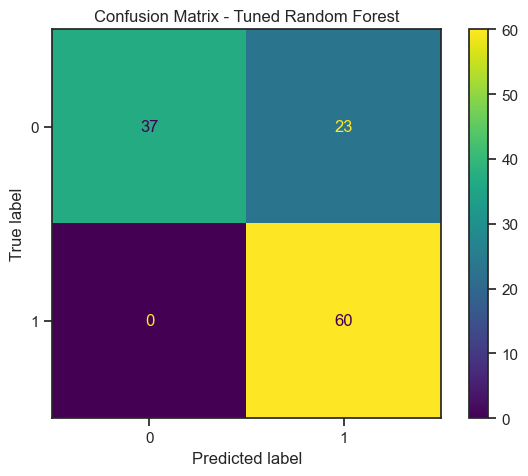

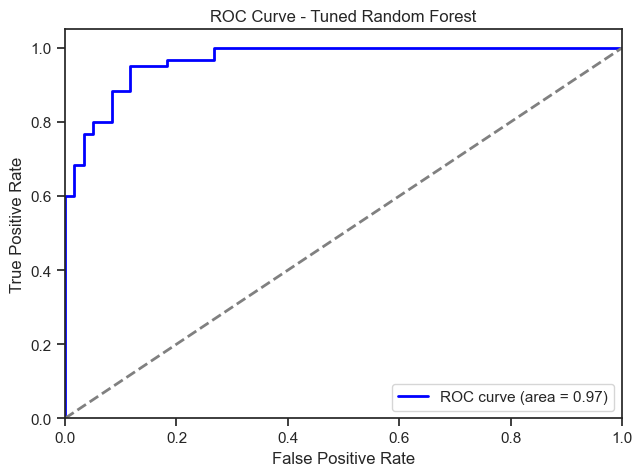

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, precision_score, accuracy_score, f1_score, recall_score)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 35, 45, 50, 55],  # Adjust these values as needed
    'max_depth': [70, 80, 90, 100],            # Adjust these values as needed
    'min_samples_split': [20, 25, 30, 45, 50, 55]   # Adjust these values as needed
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with the grid search
grid_search.fit(features_train, target_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Use the best estimator for predictions
best_rf_model = grid_search.best_estimator_
target_test_pred_rf_tuned = best_rf_model.predict(features_test_encoded)

# Model evaluation for tuned RF
precision_rf_tuned = precision_score(target_test, target_test_pred_rf_tuned)
accuracy_rf_tuned = accuracy_score(target_test, target_test_pred_rf_tuned)
f1_rf_tuned = f1_score(target_test, target_test_pred_rf_tuned)
recall_rf_tuned = recall_score(target_test, target_test_pred_rf_tuned)

# Calculate confusion matrix to derive additional metrics
conf_matrix_rf_tuned = confusion_matrix(target_test, target_test_pred_rf_tuned)
TN, FP, FN, TP = conf_matrix_rf_tuned.ravel()

# Calculate additional metrics
fdr_rf_tuned = FP / (FP + TP) if (FP + TP) > 0 else 0
fnr_rf_tuned = FN / (FN + TP) if (FN + TP) > 0 else 0
for_rf_tuned = FN / (FN + TN) if (FN + TN) > 0 else 0
fpr_rf_tuned = FP / (FP + TN) if (FP + TN) > 0 else 0
specificity_rf_tuned = TN / (TN + FP) if (TN + FP) > 0 else 0

# Print results for tuned RF model
print('Tuned RF Precision:', precision_rf_tuned)
print('Tuned RF Accuracy:', accuracy_rf_tuned)
print('Tuned RF F1 Score:', f1_rf_tuned)
print('Tuned RF Recall:', recall_rf_tuned)
print(f'Tuned RF FDR: {fdr_rf_tuned:.4f}')
print(f'Tuned RF FNR: {fnr_rf_tuned:.4f}')
print(f'Tuned RF FOR: {for_rf_tuned:.4f}')
print(f'Tuned RF FPR: {fpr_rf_tuned:.4f}')
print(f'Tuned RF Specificity: {specificity_rf_tuned:.4f}')

# Plot confusion matrix
disp_rf_tuned = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf_tuned)
disp_rf_tuned.plot()
plt.title('Confusion Matrix - Tuned Random Forest')
plt.show()

# Plot ROC curve
target_test_prob_rf_tuned = best_rf_model.predict_proba(features_test_encoded)[:, 1]
fpr_rf_tuned, tpr_rf_tuned, thresholds_rf_tuned = roc_curve(target_test, target_test_prob_rf_tuned)
roc_auc_rf_tuned = auc(fpr_rf_tuned, tpr_rf_tuned)

# Plot ROC curve with AUC
plt.figure()
plt.plot(fpr_rf_tuned, tpr_rf_tuned, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend(loc='lower right')
plt.show()


# Conventional Deep Learning

## No valid DNN

Epoch 1/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6290 - loss: 1.8625
Epoch 2/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6847 - loss: 1.8615
Epoch 3/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7546 - loss: 1.1806
Epoch 4/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8431 - loss: 0.6179
Epoch 5/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8382 - loss: 26.1936
Epoch 6/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8534 - loss: 0.5757
Epoch 7/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8380 - loss: 0.6238
Epoch 8/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8831 - loss: 0.6590
Epoch 9/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8797 - loss: 0.4686
Epoch 10/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.5707
Epoch 11/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8751 - loss: 0.9626
Epoch 12/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

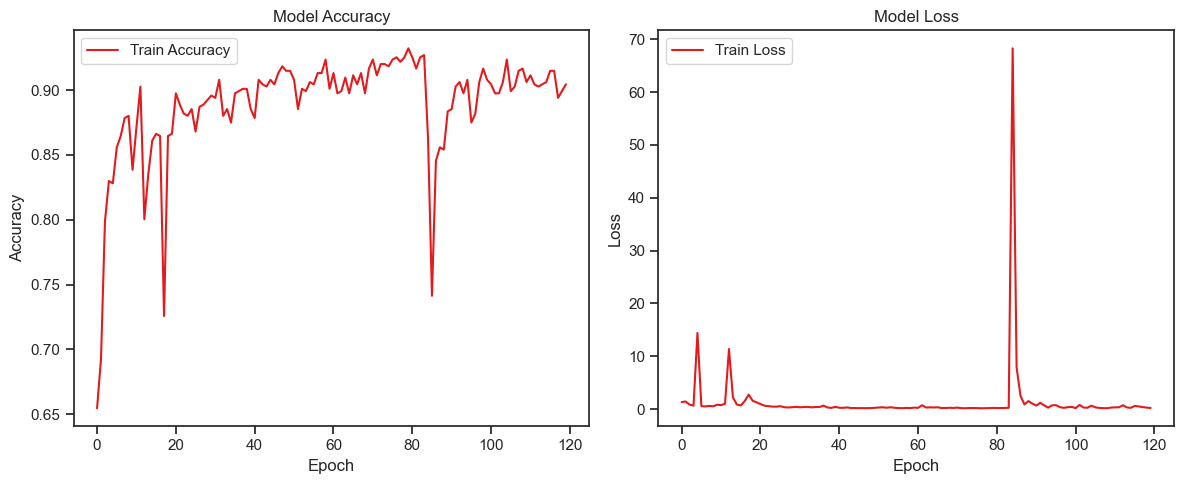

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the model
model_dnn = Sequential()

# Add input layer with the same number of neurons as features and a 'relu' activation function
model_dnn.add(Dense(192, activation='relu', input_shape=(features_train.shape[1],)))

# Add one hidden layer with 'relu' activation function
model_dnn.add(Dense(96, activation='relu'))

# Add one hidden layer with 'relu' activation function
model_dnn.add(Dense(24, activation='relu'))

# Add one hidden layer with 'relu' activation function
model_dnn.add(Dense(28, activation='relu'))

# Add output layer with a single neuron and 'sigmoid' activation function for binary classification
model_dnn.add(Dense(1, activation='sigmoid'))

# Compile the model with 'adam' optimizer and 'binary_crossentropy' loss function for binary classification
model_dnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
history_dnn = model_dnn.fit(features_train, target_train, epochs=120, batch_size=16)

# Predict target values from DNN model
target_test_pred_dnn = (model_dnn.predict(features_test_encoded) > 0.5).astype(int)

# Evaluate the model on the test set
scores_dnn = model_dnn.evaluate(features_test_encoded, target_test, verbose=0)

# Calculate precision, recall, and F1 score on the test set
precision_dnn = precision_score(target_test, target_test_pred_dnn)
recall_dnn = recall_score(target_test, target_test_pred_dnn)
f1_dnn = f1_score(target_test, target_test_pred_dnn)

# Print results for DNN
print('DNN Test Accuracy: ', scores_dnn[1])
print('DNN Test Precision: ', precision_dnn)
print('DNN Test Recall: ', recall_dnn)
print('DNN Test F1 Score: ', f1_dnn)

# Plot the accuracy vs loss graph
plt.figure(figsize=(12, 5))

# Plot training accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_dnn.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training loss values
plt.subplot(1, 2, 2)
plt.plot(history_dnn.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Dense Neural Network

Epoch 1/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5085 - loss: 5551.2261 - val_accuracy: 0.5000 - val_loss: 1178.2225
Epoch 2/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4345 - loss: 1265.2808 - val_accuracy: 0.5083 - val_loss: 2.8303
Epoch 3/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5507 - loss: 1.0204 - val_accuracy: 0.7167 - val_loss: 1.2252
Epoch 4/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7005 - loss: 1.1864 - val_accuracy: 0.7167 - val_loss: 1.2264
Epoch 5/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7061 - loss: 0.7810 - val_accuracy: 0.7167 - val_loss: 1.2215
Epoch 6/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6753 - loss: 1.0228 - val_accuracy: 0.7333 - val_loss: 1.1855
Epoch 7/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7037 - loss: 0.6733 - val_accuracy: 0.7500 - val_loss: 1.0988
Epoch 8/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7270 - loss: 0.6704 - val_accuracy: 0

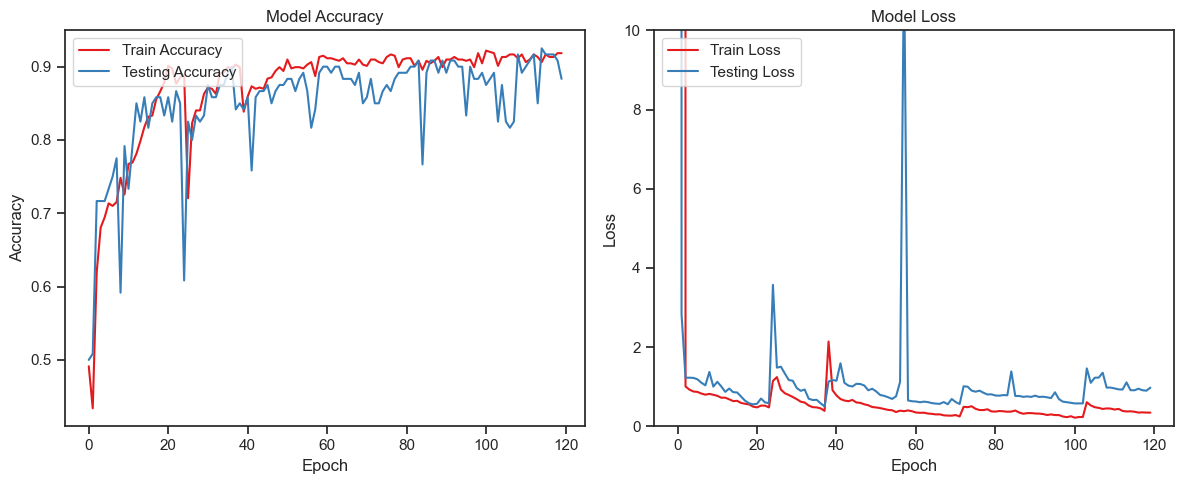

In [27]:

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the model
model_dnn = Sequential()

# Add input layer with the same number of neurons as features and a 'relu' activation function
model_dnn.add(Dense(128, activation='relu', input_shape=(features_train.shape[1],)))

# Add one hidden layer with 'relu' activation function
model_dnn.add(Dense(64, activation='relu'))

# Add one hidden layer with 'relu' activation function
model_dnn.add(Dense(32, activation='relu'))

# Add one hidden layer with 'relu' activation function
model_dnn.add(Dense(16, activation='relu'))

# Add output layer with a single neuron and 'sigmoid' activation function for binary classification
model_dnn.add(Dense(1, activation='sigmoid'))

# Compile the model with 'adam' optimizer and 'binary_crossentropy' loss function for binary classification
model_dnn.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data and capture the training history
history_dnn = model_dnn.fit(features_train, target_train, epochs=120, batch_size=16, validation_data=(features_test_encoded, target_test))

# Predict target values from DNN model
target_test_pred_dnn = (model_dnn.predict(features_test_encoded) > 0.5).astype(int)

# Evaluate the model
scores_dnn = model_dnn.evaluate(features_test_encoded, target_test, verbose=0)

# Calculate precision, recall, and F1 score
precision_dnn = precision_score(target_test, target_test_pred_dnn)
recall_dnn = recall_score(target_test, target_test_pred_dnn)
f1_dnn = f1_score(target_test, target_test_pred_dnn)

# Print results for DNN
print('DNN Accuracy: ', scores_dnn[1])
print('DNN Precision: ', precision_dnn)
print('DNN Recall: ', recall_dnn)
print('DNN F1 Score: ', f1_dnn)

# Plot the accuracy vs loss graph
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_dnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='Testing Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dnn.history['loss'], label='Train Loss')
plt.plot(history_dnn.history['val_loss'], label='Testing Loss')
plt.ylim(0, 45)  # Set the y-axis range from 0 to 25
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 10)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Improved DNN

Epoch 1/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4847 - loss: 4346.0703 - val_accuracy: 0.5500 - val_loss: 250.1386
Epoch 2/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6064 - loss: 218.7717 - val_accuracy: 0.6750 - val_loss: 1.4657
Epoch 3/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6957 - loss: 0.6372 - val_accuracy: 0.7083 - val_loss: 1.2816
Epoch 4/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7064 - loss: 0.6245 - val_accuracy: 0.7250 - val_loss: 1.1026
Epoch 5/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7082 - loss: 0.8433 - val_accuracy: 0.7500 - val_loss: 1.0092
Epoch 6/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7491 - loss: 0.7973 - val_accuracy: 0.6667 - val_loss: 1.1702
Epoch 7/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7143 - loss: 0.8724 - val_accuracy: 0.7167 - val_loss: 0.9966
Epoch 8/120
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7465 - loss: 0.7275 - val_accuracy: 0.

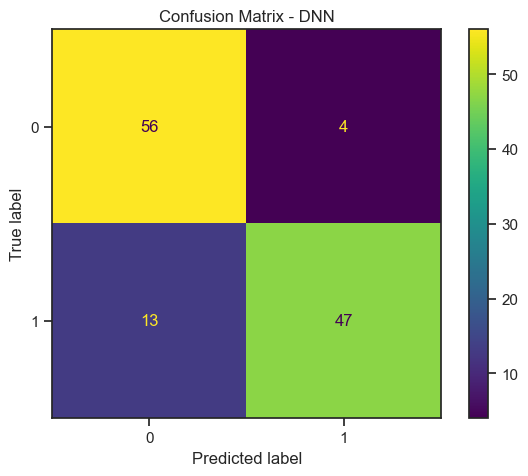

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


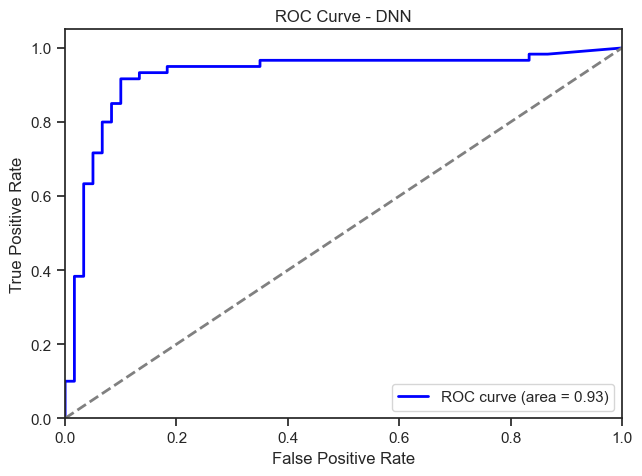

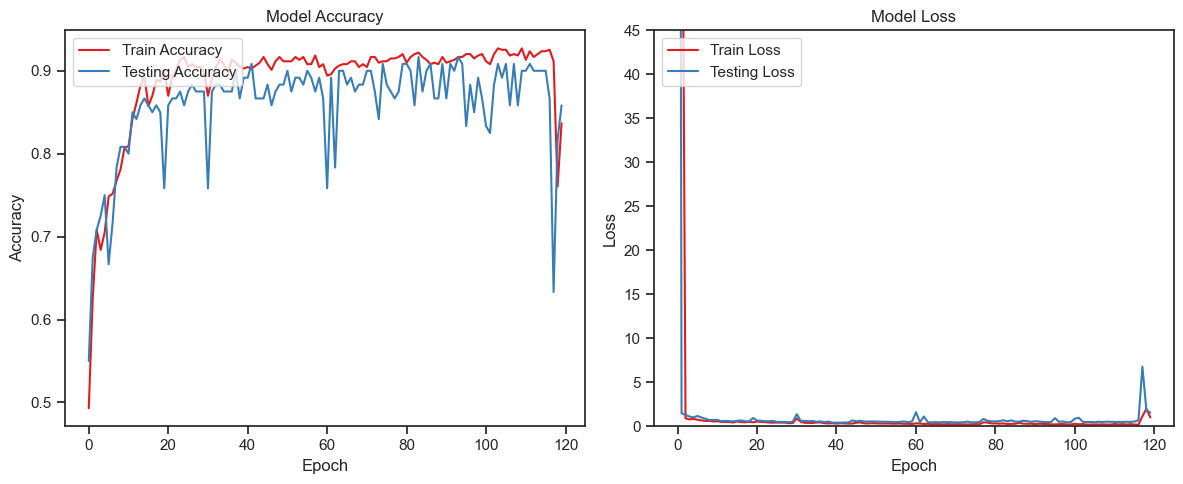

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Define the model
model_dnn = Sequential()

# Add input layer with the same number of neurons as features and a 'relu' activation function
model_dnn.add(Dense(192, activation='relu', input_shape=(features_train.shape[1],)))

# Add hidden layers with 'relu' activation function
model_dnn.add(Dense(96, activation='relu'))
model_dnn.add(Dense(24, activation='relu'))
model_dnn.add(Dense(28, activation='relu'))

# Add output layer with a single neuron and 'sigmoid' activation function for binary classification
model_dnn.add(Dense(1, activation='sigmoid'))

# Compile the model with 'adam' optimizer and 'binary_crossentropy' loss function for binary classification
model_dnn.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data and capture the training history
history_dnn = model_dnn.fit(features_train, target_train, epochs=120, batch_size=16, validation_data=(features_test_encoded, target_test))

# Predict target values from DNN model
target_test_pred_dnn = (model_dnn.predict(features_test_encoded) > 0.5).astype(int)

# Evaluate the model
scores_dnn = model_dnn.evaluate(features_test_encoded, target_test, verbose=0)

# Calculate precision, recall, and F1 score
precision_dnn = precision_score(target_test, target_test_pred_dnn)
recall_dnn = recall_score(target_test, target_test_pred_dnn)
f1_dnn = f1_score(target_test, target_test_pred_dnn)

# Calculate confusion matrix to derive additional metrics
conf_matrix_dnn = confusion_matrix(target_test, target_test_pred_dnn)
TN, FP, FN, TP = conf_matrix_dnn.ravel()

# Calculate additional metrics
fdr_dnn = FP / (FP + TP) if (FP + TP) > 0 else 0
fnr_dnn = FN / (FN + TP) if (FN + TP) > 0 else 0
for_dnn = FN / (FN + TN) if (FN + TN) > 0 else 0
fpr_dnn = FP / (FP + TN) if (FP + TN) > 0 else 0
specificity_dnn = TN / (TN + FP) if (TN + FP) > 0 else 0

# Print results for DNN
print('DNN Accuracy:', scores_dnn[1])
print('DNN Precision:', precision_dnn)
print('DNN Recall:', recall_dnn)
print('DNN F1 Score:', f1_dnn)
print(f'DNN FDR: {fdr_dnn:.4f}')
print(f'DNN FNR: {fnr_dnn:.4f}')
print(f'DNN FOR: {for_dnn:.4f}')
print(f'DNN FPR: {fpr_dnn:.4f}')
print(f'DNN Specificity: {specificity_dnn:.4f}')

# Plot confusion matrix
disp_dnn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dnn)
disp_dnn.plot()
plt.title('Confusion Matrix - DNN')
plt.show()

# Plot ROC curve
target_test_prob_dnn = model_dnn.predict(features_test_encoded)
fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(target_test, target_test_prob_dnn)
roc_auc_dnn = auc(fpr_dnn, tpr_dnn)

# Plot ROC curve with AUC
plt.figure()
plt.plot(fpr_dnn, tpr_dnn, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_dnn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DNN')
plt.legend(loc='lower right')
plt.show()

# Plot the accuracy vs loss graph
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_dnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='Testing Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dnn.history['loss'], label='Train Loss')
plt.plot(history_dnn.history['val_loss'], label='Testing Loss')
plt.ylim(0, 45)  # Set the y-axis range from 0 to 25
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


## LSTM

In [29]:
features_train_array = features_train.values
features_train_reshaped = features_train_array.reshape(features_train.shape[0], 10, -1).astype(np.float32)

features_test_array = features_test_encoded.values
features_test_reshaped = features_test_array.reshape(features_test_encoded.shape[0], 10, -1).astype(np.float32)

# Convert target_train and target_test to NumPy arrays and ensure they are of type float32
target_train = target_train.values.astype(np.float32)
target_test = target_test.values.astype(np.float32)

Epoch 1/170
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6274 - loss: 0.6798 - val_accuracy: 0.6667 - val_loss: 0.6709
Epoch 2/170
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7301 - loss: 0.6615 - val_accuracy: 0.6750 - val_loss: 0.6550
Epoch 3/170
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7358 - loss: 0.6424 - val_accuracy: 0.6917 - val_loss: 0.6402
Epoch 4/170
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7685 - loss: 0.6190 - val_accuracy: 0.6917 - val_loss: 0.6244
Epoch 5/170
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7868 - loss: 0.5943 - val_accuracy: 0.7167 - val_loss: 0.6153
Epoch 6/170
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7811 - loss: 0.5815 - val_accuracy: 0.7250 - val_loss: 0.6055
Epoch 7/170
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8134 - loss: 0.5539 - val_accuracy: 0.7250 - val_loss: 0.5969
Epoch 8/170
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7810 - loss: 0.5666 - val_accuracy: 0.7250 -

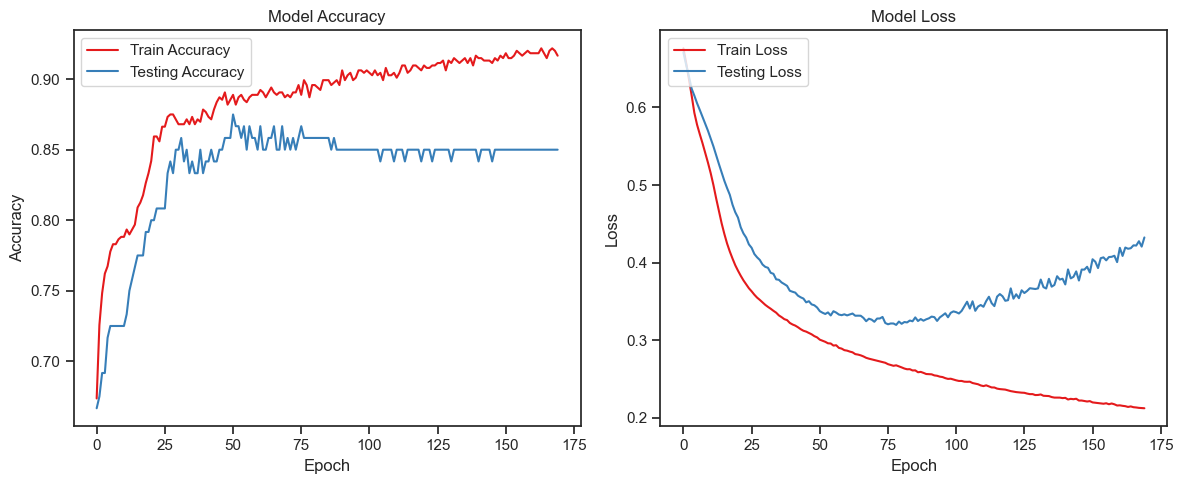

In [30]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import precision_score, accuracy_score

# Assuming features_train_reshaped is a 3D array of shape (num_samples, time_steps, num_features)
# and target_train is a 2D array of shape (num_samples, 1) with binary labels

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=90, return_sequences=False, input_shape=(features_train_reshaped.shape[1], features_train_reshaped.shape[2])))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the reshaped training data and capture the training history
history_lstm_Adam = model_lstm.fit(features_train_reshaped, target_train, epochs=170, batch_size=32, validation_data=(features_test_encoded, target_test))

# Predict target values from LSTM model
target_test_pred_lstm = model_lstm.predict(features_test_encoded)

# Model evaluation for LSTM
# Convert predictions to binary labels
target_test_pred_lstm_binary = (target_test_pred_lstm > 0.5).astype(int)

# Precision and Accuracy
precision_lstm = precision_score(target_test, target_test_pred_lstm_binary)
accuracy_lstm = accuracy_score(target_test, target_test_pred_lstm_binary)
#recall_lstm = recall_score(target_test, target_test_pred_lstm)
#f1_lstm = f1_score(target_test, target_test_pred_lstm)

# Print results for LSTM
print('LSTM Precision: ', precision_lstm)
print('LSTM Accuracy: ', accuracy_lstm)
#print('DNN Recall: ', recall_lstm)
#print('DNN F1 Score: ', f1_lstm)


# Plot the accuracy vs. loss graph
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_lstm_Adam.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm_Adam.history['val_accuracy'], label='Testing Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_lstm_Adam.history['loss'], label='Train Loss')
plt.plot(history_lstm_Adam.history['val_loss'], label='Testing Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


## LSTM improved

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.4996 - loss: 0.8875 - val_accuracy: 0.5083 - val_loss: 0.6915
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6680 - loss: 0.6384 - val_accuracy: 0.5167 - val_loss: 0.6718
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7033 - loss: 0.6016 - val_accuracy: 0.5417 - val_loss: 0.6546
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7446 - loss: 0.5407 - val_accuracy: 0.6167 - val_loss: 0.6362
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7755 - loss: 0.4767 - val_accuracy: 0.6333 - val_loss: 0.6180
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7771 - loss: 0.5046 - val_accuracy: 0.6417 - val_loss: 0.6018
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8160 - loss: 0.4357 - val_accuracy: 0.6917 - val_loss: 0.5884
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8110 - loss: 0.4221 - val_accuracy: 0.

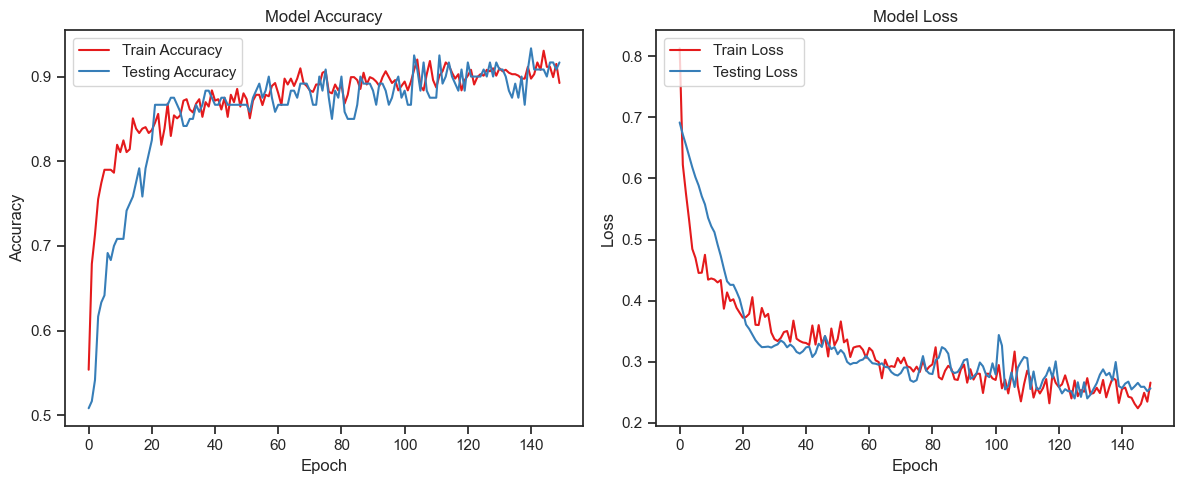

In [31]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.metrics import precision_score, accuracy_score

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=256, return_sequences=True, input_shape=(features_train_reshaped.shape[1], features_train_reshaped.shape[2])))
model_lstm.add(Dropout(0.2))  # Adding dropout to prevent overfitting
model_lstm.add(BatchNormalization())

model_lstm.add(LSTM(units=128, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(BatchNormalization())

model_lstm.add(Dense(64, activation='relu'))  # Adding dense layer with ReLU activation
model_lstm.add(Dropout(0.2))
model_lstm.add(BatchNormalization())

model_lstm.add(Dense(32, activation='relu'))  # Adding dense layer with ReLU activation
model_lstm.add(Dropout(0.2))
model_lstm.add(BatchNormalization())

model_lstm.add(Dense(16, activation='relu'))  # Adding dense layer with ReLU activation
model_lstm.add(Dropout(0.2))
model_lstm.add(BatchNormalization())

model_lstm.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model_lstm.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the reshaped training data and capture the training history
history_lstm_Adam = model_lstm.fit(features_train_reshaped, target_train, epochs=150, batch_size=32, validation_data=(features_test_encoded, target_test))

# Predict target values from LSTM model
target_test_pred_lstm = model_lstm.predict(features_test_encoded)

# Model evaluation for LSTM
# Convert predictions to binary labels
target_test_pred_lstm_binary = (target_test_pred_lstm > 0.5).astype(int)

# Precision and Accuracy
precision_lstm = precision_score(target_test, target_test_pred_lstm_binary)
accuracy_lstm = accuracy_score(target_test, target_test_pred_lstm_binary)

# Print results for LSTM
print('LSTM Precision: ', precision_lstm)
print('LSTM Accuracy: ', accuracy_lstm)

# Plot the accuracy vs. loss graph
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_lstm_Adam.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm_Adam.history['val_accuracy'], label='Testing Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_lstm_Adam.history['loss'], label='Train Loss')
plt.plot(history_lstm_Adam.history['val_loss'], label='Testing Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [32]:
from sklearn.metrics import confusion_matrix

# Convert predictions to binary labels
target_test_pred_lstm_binary = (target_test_pred_lstm > 0.5).astype(int)

# Compute confusion matrix
conf_matrix_lstm = confusion_matrix(target_test, target_test_pred_lstm_binary)

# Extract values from the confusion matrix
TN_lstm = conf_matrix_lstm[0, 0]
FP_lstm = conf_matrix_lstm[0, 1]
FN_lstm = conf_matrix_lstm[1, 0]
TP_lstm = conf_matrix_lstm[1, 1]

# Calculate metrics
FDR_lstm = FP_lstm / (FP_lstm + TP_lstm)
FNR_lstm = FN_lstm / (FN_lstm + TP_lstm)
FOR_lstm = FN_lstm / (FN_lstm + TN_lstm)
FPR_lstm = FP_lstm / (FP_lstm + TN_lstm)
Specificity_lstm = TN_lstm / (TN_lstm + FP_lstm)
recall = TP / (TP + FN)
# Print the metrics
print("LSTM False Discovery Rate (FDR):", FDR_lstm)
print("LSTM False Negative Rate (FNR):", FNR_lstm)
print("LSTM False Omission Rate (FOR):", FOR_lstm)
print("LSTM False Positive Rate (FPR):", FPR_lstm)
print("LSTM Specificity:", Specificity_lstm)
print("Recall:", recall)


LSTM False Discovery Rate (FDR): 0.08333333333333333
LSTM False Negative Rate (FNR): 0.08333333333333333
LSTM False Omission Rate (FOR): 0.08333333333333333
LSTM False Positive Rate (FPR): 0.08333333333333333
LSTM Specificity: 0.9166666666666666
Recall: 0.7833333333333333


## Autoencoder

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.2477 - val_loss: 0.2581
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2453 - val_loss: 0.2642
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2406 - val_loss: 0.2717
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2365 - val_loss: 0.2816
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2294 - val_loss: 0.2930
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2265 - val_loss: 0.3018
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2213 - val_loss: 0.3103
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2114 - val_loss: 0.3177
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2010 - val_loss: 0.3235
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1939 - val_loss: 0.3239
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1837 - val_loss: 0.3217
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

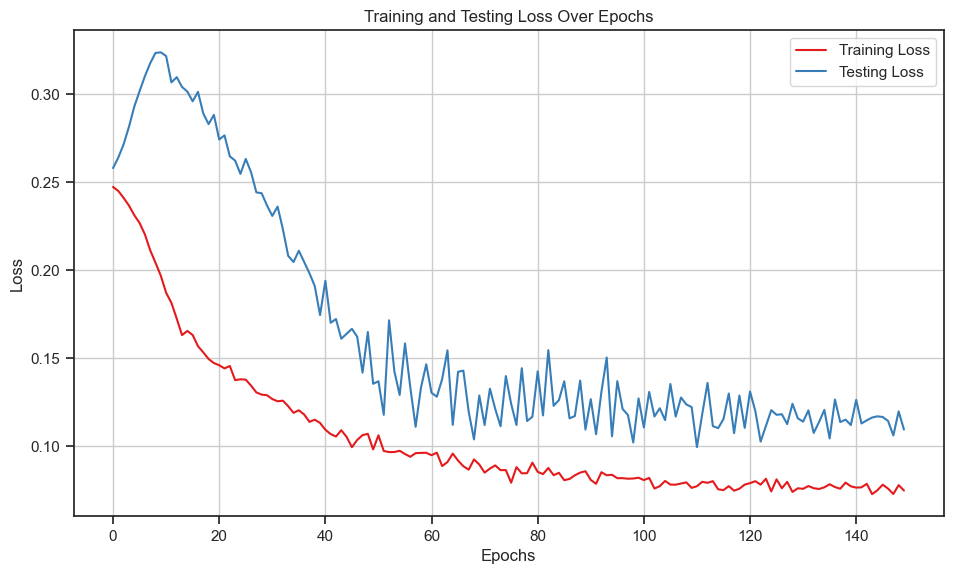

In [33]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Assuming features_train_reshaped and target_train are already defined
# target_train should be the original features, not binary labels in this context

# Define the encoder part
encoder = Sequential()
encoder.add(LSTM(units=64, return_sequences=True, input_shape=(10, features_train_reshaped.shape[2])))
encoder.add(LSTM(units=32, return_sequences=False))
encoder.add(Dense(units=16, activation='relu'))
encoder.add(Dropout(0.2))  # Add dropout to prevent overfitting

# Bottleneck layer
encoder.add(Dense(units=8, activation='relu'))

# Define the decoder part
decoder = Sequential()
decoder.add(Dense(units=16, activation='relu', input_shape=(8,)))
decoder.add(Dense(units=32, activation='relu'))
decoder.add(Dense(units=64, activation='relu'))
decoder.add(Dense(units=features_train_reshaped.shape[2], activation='sigmoid'))  # Assuming sigmoid because of normalized data

# Combine encoder and decoder to create the autoencoder
autoencoder = Sequential([encoder, decoder])

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Define early stopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the autoencoder to the reshaped training data and store the history
history = autoencoder.fit(features_train_reshaped, target_train, epochs=150, batch_size=32, validation_split=0.2)

# Predict the reconstructed inputs from the autoencoder
reconstructed_features = autoencoder.predict(features_train_reshaped)

# Calculate the mean squared error between the original and reconstructed features
reconstruction_loss = mean_squared_error(target_train, reconstructed_features)

# Print the reconstruction loss
print('Reconstruction Loss (MSE): ', reconstruction_loss)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Training and Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Classifer

Epoch 1/170
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4910 - loss: 0.7655 - val_accuracy: 0.2333 - val_loss: 0.7035
Epoch 2/170
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5074 - loss: 0.6988 - val_accuracy: 0.5083 - val_loss: 0.6863
Epoch 3/170
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5921 - loss: 0.6860 - val_accuracy: 0.8333 - val_loss: 0.6716
Epoch 4/170
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6506 - loss: 0.6560 - val_accuracy: 0.8083 - val_loss: 0.6417
Epoch 5/170
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6345 - loss: 0.6433 - val_accuracy: 0.8000 - val_loss: 0.6196
Epoch 6/170
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6828 - loss: 0.6194 - val_accuracy: 0.8583 - val_loss: 0.6025
Epoch 7/170
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7173 - loss: 0.6065 - val_accuracy: 0.8167 - val_loss: 0.5782
Epoch 8/170
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7102 - loss: 0.5989 - val_accuracy: 0.8583 - 

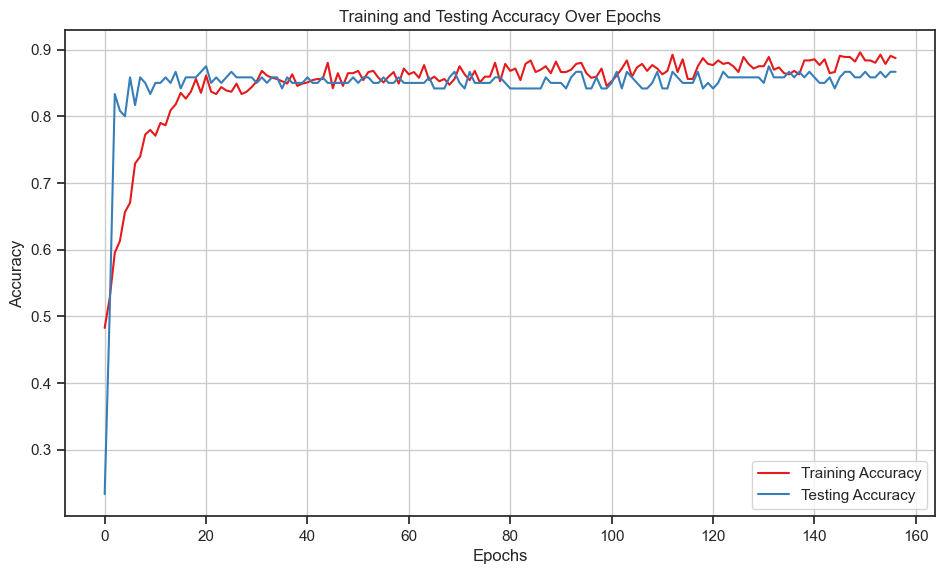

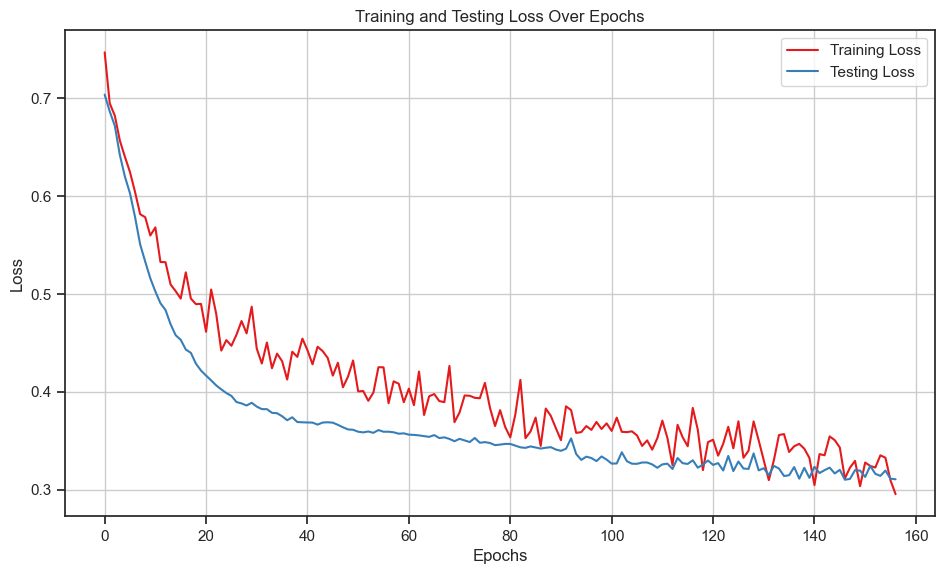

In [34]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Assuming encoder, features_train_reshaped, features_test_encoded, target_train, and target_test are already defined

# Define the classifier model
classifier = Sequential()
classifier.add(encoder)
classifier.add(Dropout(0.5))  # Add dropout after the encoder to prevent overfitting
classifier.add(Dense(units=64, activation='relu'))  # Add a dense layer with 64 units and ReLU activation
classifier.add(Dropout(0.5))  # Add another dropout layer
classifier.add(Dense(units=1, activation='sigmoid'))  # Binary classification output

# Compile the classifier
classifier.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the classifier and store the history
classifier_history = classifier.fit(
    features_train_reshaped, 
    target_train, 
    epochs=170, 
    batch_size=16, 
    validation_data=(features_test_encoded, target_test),
    callbacks=[early_stopping]
)

# Evaluate the classifier
loss, accuracy = classifier.evaluate(features_test_encoded, target_test)
print('Test Accuracy: ', accuracy)

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(classifier_history.history['accuracy'], label='Training Accuracy')
plt.plot(classifier_history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(classifier_history.history['loss'], label='Training Loss')
plt.plot(classifier_history.history['val_loss'], label='Testing Loss')
plt.title('Training and Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix

# Get predictions from the classifier
predictions = classifier.predict(features_test_encoded)
# Apply threshold to get class predictions (assuming binary classification and threshold of 0.5)
predictions = (predictions > 0.5).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(target_test, predictions)

# Extract values from the confusion matrix
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate metrics
FDR = FP / (FP + TP)
FNR = FN / (FN + TP)
FOR = FN / (FN + TN)
FPR = FP / (FP + TN)
Specificity = TN / (TN + FP)

# Print the metrics
print("False Discovery Rate (FDR):", FDR)
print("False Negative Rate (FNR):", FNR)
print("False Omission Rate (FOR):", FOR)
print("False Positive Rate (FPR):", FPR)
print("Specificity:", Specificity)

# Calculate additional metrics: Precision, Recall, and F1 Score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
False Discovery Rate (FDR): 0.14516129032258066
False Negative Rate (FNR): 0.11666666666666667
False Omission Rate (FOR): 0.1206896551724138
False Positive Rate (FPR): 0.15
Specificity: 0.85
Precision: 0.8548387096774194
Recall: 0.8833333333333333
F1 Score: 0.8688524590163934


## ResNet

Epoch 1/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5838 - loss: 42.5931 - val_accuracy: 0.7333 - val_loss: 12.1588
Epoch 2/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7292 - loss: 8.5082 - val_accuracy: 0.7250 - val_loss: 6.3108
Epoch 3/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7507 - loss: 3.9260 - val_accuracy: 0.6833 - val_loss: 5.3639
Epoch 4/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7595 - loss: 3.1112 - val_accuracy: 0.8167 - val_loss: 1.4851
Epoch 5/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7684 - loss: 2.9793 - val_accuracy: 0.7500 - val_loss: 4.0545
Epoch 6/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7635 - loss: 2.7921 - val_accuracy: 0.8667 - val_loss: 1.1070
Epoch 7/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8513 - loss: 1.3710 - val_accuracy: 0.7667 - val_loss: 1.3993
Epoch 8/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8115 - loss: 1.9419 - val_accuracy: 0.8833 

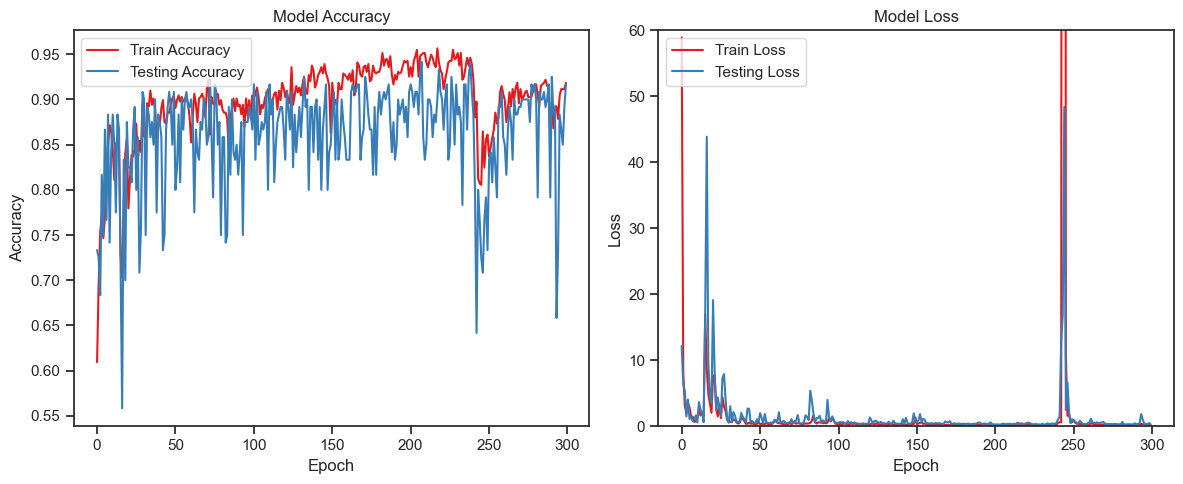

In [36]:
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense, add
from keras.optimizers import Adam

# Define the identity block
def identity_block(input_tensor, units):
    x = Dense(units, activation='relu')(input_tensor)
    x = Dense(units)(x)
    x = add([x, input_tensor])
    x = Dense(units, activation='relu')(x)
    return x

# Input layer
inputs = Input(shape=(features_train.shape[1],))

# First dense layer
x = Dense(64, activation='relu')(inputs)

# Residual blocks
x = identity_block(x, 64)
x = identity_block(x, 64)

# Output layer
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
model_resnet = Model(inputs, outputs)

# Compile the model
model_resnet.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data and capture the training history
history_resnet = model_resnet.fit(features_train, target_train, epochs=300, batch_size=16, validation_data=(features_test_encoded, target_test))

# Predict target values from ResNet model
target_test_pred_resnet = model_resnet.predict(features_test_encoded)

# Evaluate the model
scores_resnet = model_resnet.evaluate(features_test_encoded, target_test, verbose=0)

resnet_loss = scores_resnet[0]

# Print results for ResNet
print('ResNet Accuracy: ', scores_resnet[1])

# Plot the accuracy vs. loss graph
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Testing Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Testing Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.ylim(0,60)
plt.tight_layout()
plt.show()


In [37]:
# Calculate TP, FP, TN, FN
TP_resnet = sum((target_test_pred_resnet.flatten() > 0.5) & (target_test == 1))
FP_resnet = sum((target_test_pred_resnet.flatten() > 0.5) & (target_test == 0))
TN_resnet = sum((target_test_pred_resnet.flatten() <= 0.5) & (target_test == 0))
FN_resnet = sum((target_test_pred_resnet.flatten() <= 0.5) & (target_test == 1))

# Calculate metrics
FDR_resnet = FP_resnet / (TP_resnet + FP_resnet)
FNR_resnet = FN_resnet / (TP_resnet + FN_resnet)
FOR_resnet = FN_resnet / (TN_resnet + FN_resnet)
FPR_resnet = FP_resnet / (FP_resnet + TN_resnet)
specificity_resnet = TN_resnet / (TN_resnet + FP_resnet)

# Calculate precision, recall, and F1 score
precision_resnet = TP_resnet / (TP_resnet + FP_resnet)
recall_resnet = TP_resnet / (TP_resnet + FN_resnet)
f1_score_resnet = 2 * (precision_resnet * recall_resnet) / (precision_resnet + recall_resnet)

# Print results
print('ResNet FDR:', FDR_resnet)
print('ResNet FNR:', FNR_resnet)
print('ResNet FOR:', FOR_resnet)
print('ResNet FPR:', FPR_resnet)
print('ResNet Specificity:', specificity_resnet)
print('ResNet Precision:', precision_resnet)
print('ResNet Recall:', recall_resnet)
print('ResNet F1 Score:', f1_score_resnet)


ResNet FDR: 0.08333333333333333
ResNet FNR: 0.08333333333333333
ResNet FOR: 0.08333333333333333
ResNet FPR: 0.08333333333333333
ResNet Specificity: 0.9166666666666666
ResNet Precision: 0.9166666666666666
ResNet Recall: 0.9166666666666666
ResNet F1 Score: 0.9166666666666666


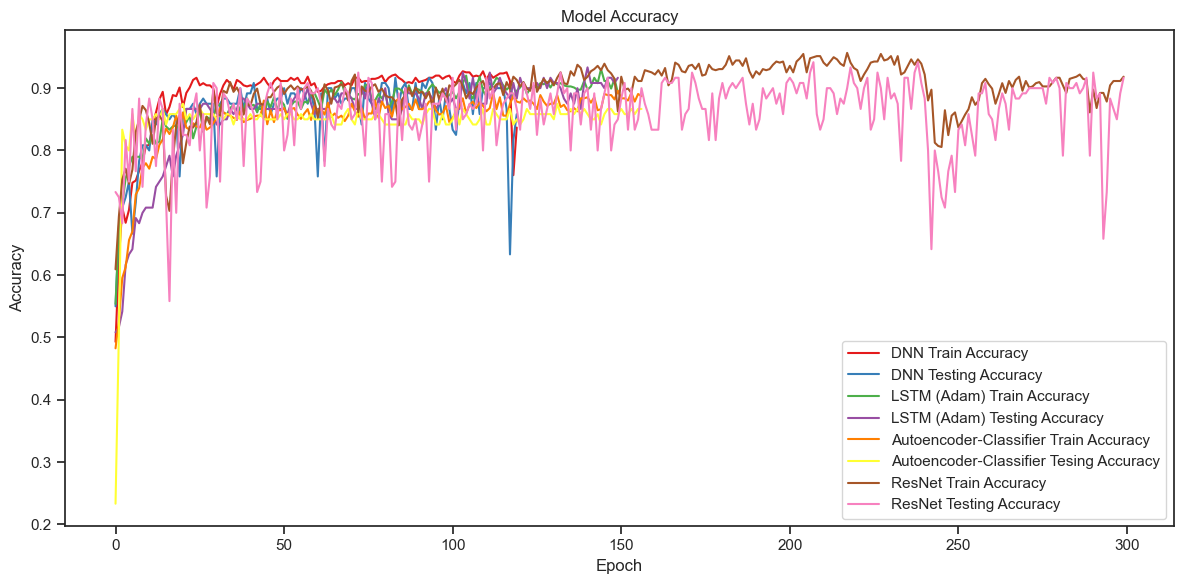

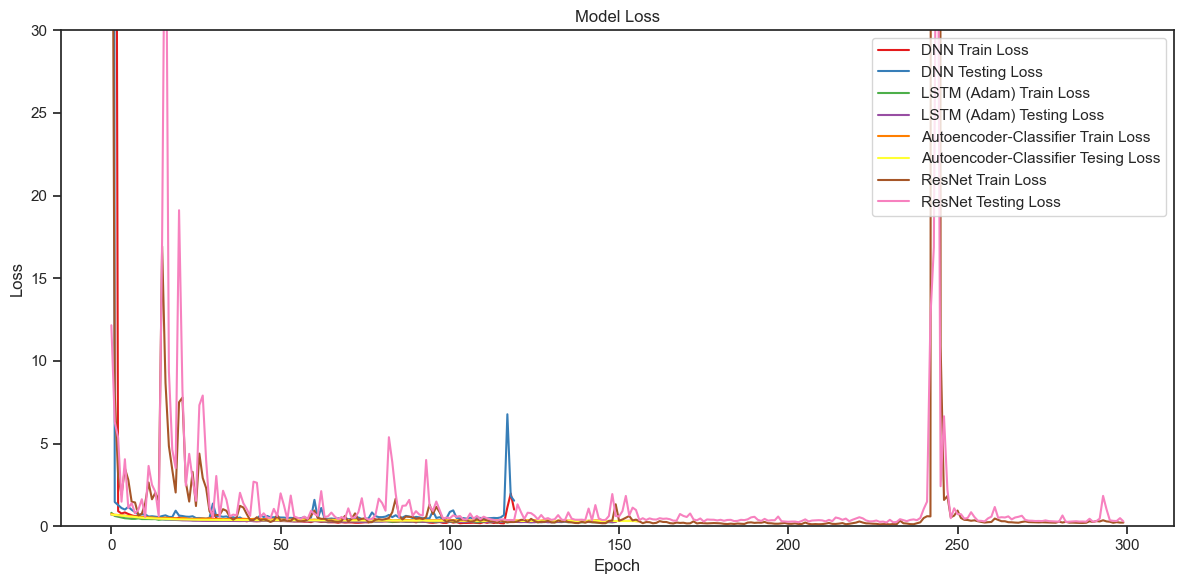

In [38]:
import matplotlib.pyplot as plt

# Plot the accuracy for all models
plt.figure(figsize=(12, 6))
plt.plot(history_dnn.history['accuracy'], label='DNN Train Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='DNN Testing Accuracy')
plt.plot(history_lstm_Adam.history['accuracy'], label='LSTM (Adam) Train Accuracy')
plt.plot(history_lstm_Adam.history['val_accuracy'], label='LSTM (Adam) Testing Accuracy')
plt.plot(classifier_history.history['accuracy'], label='Autoencoder-Classifier Train Accuracy')
plt.plot(classifier_history.history['val_accuracy'], label='Autoencoder-Classifier Tesing Accuracy')
plt.plot(history_resnet.history['accuracy'], label='ResNet Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet Testing Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Plot the loss for all models
plt.figure(figsize=(12, 6))
plt.plot(history_dnn.history['loss'], label='DNN Train Loss')
plt.plot(history_dnn.history['val_loss'], label='DNN Testing Loss')
plt.plot(history_lstm_Adam.history['loss'], label='LSTM (Adam) Train Loss')
plt.plot(history_lstm_Adam.history['val_loss'], label='LSTM (Adam) Testing Loss')
plt.plot(classifier_history.history['loss'], label='Autoencoder-Classifier Train Loss')
plt.plot(classifier_history.history['val_loss'], label='Autoencoder-Classifier Tesing Loss')
plt.plot(history_resnet.history['loss'], label='ResNet Train Loss')
plt.plot(history_resnet.history['val_loss'], label='ResNet Testing Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 30)  # Set y-axis limits
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [39]:
features_test_encoded.head()

,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,extern_url,private,num_posts,num_followers,num_following
0,0,0.33,1,0.33,30,0,0,35,488.0,604
1,0,0.00,5,0.00,64,0,0,3,35.0,6
2,0,0.00,2,0.00,82,0,0,319,328.0,668
3,0,0.00,1,0.00,143,0,0,273,14890.0,7369
4,0,0.50,1,0.00,76,0,0,6,225.0,356


## Saving KNN

In [40]:
import pickle

# Save ML model
pickle.dump(grid_search.best_estimator_,open('tuned_knn.pkl','wb'))
pickled_model = pickle.load(open('tuned_knn.pkl','rb'))
prediction = pickled_model.predict(np.array([1,0,6,0,0,2,2,3,430,630]).reshape(1, -1))
if prediction==0:
    print('This account is not Spam!')
else:
    print('This account is Spam!')

This account is not Spam!


## Saving Dec Tree

In [41]:
pickle.dump(model_dt,open('model_dt.pkl','wb'))
pickled_model = pickle.load(open('model_dt.pkl','rb'))
prediction = pickled_model.predict(np.array([1,0,6,0,0,2,2,3,430,630]).reshape(1, -1))
if prediction==0:
    print('This account is not Spam!')
else:
    print('This account is Spam!')

This account is not Spam!


## Saving RandomForest

In [42]:
pickle.dump(model_rf,open('model_rf.pkl','wb'))
pickled_model = pickle.load(open('model_rf.pkl','rb'))
prediction = pickled_model.predict(np.array([1,0,6,0,0,2,2,3,430,630]).reshape(1, -1))
if prediction==0:
    print('This account is not Spam!')
else:
    print('This account is Spam!')

This account is not Spam!


## Saving SVM

In [43]:
pickle.dump(model_svm,open('model_svm.pkl','wb'))
pickled_model = pickle.load(open('model_svm.pkl','rb'))
prediction = pickled_model.predict(np.array([1,0,6,0,0,2,2,3,430,630]).reshape(1, -1))
if prediction==0:
    print('This account is not Spam!')
else:
    print('This account is Spam!')

This account is Spam!


## Saving DNN

In [44]:
# Save the entire model
model_dnn.save('model_dnn.h5')

## Saving LSTM

In [45]:
# Save the entire model
model_lstm.save('model_lstm.h5')

## Saving Autoencoder - Classifier

In [46]:
# Save the entire model
classifier.save('classifier.h5')

## Saving ResNet

In [50]:
# Save the entire model
model_resnet.save('model_resnet.h5')
prediction = model_resnet.predict(np.array([1,0,6,0,0,2,2,3,430,630]).reshape(1, -1))
if prediction==0:
    print('This account is not Spam!')
else:
    print('This account is Spam!')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
This account is Spam!
